<h1> Exploring the Relationship Between Currency Exchange Rates and Labor Rates</h1>

<h3>Statement of Purpose</h3>

   <p>The purpose of this project is test if it is possible to predict the relative values of national currenies in the moderate or long term using the relative rates of labor (employment and unemploment ect.) between the two nations. The test case in this case will be the value of the Australian dollar as opposed to the American dollar and the respective labor data of both nations.</p> 
    
    
    
   <p>All labor data is taken from the <html><a href = "https://www.ilo.org/global/lang--en/index.htm">ILO</a></html> while all currency exhange data is taken from <a href ="https://www.kaggle.com/thebasss/currency-exchange-rates">kaggle</a>.</p>

In [2]:
#Import the libraries.

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import sklearn as sk
import time
from scipy import stats
import itertools

<h3>Data Aquisition and Cleaning</h3>

Please note: I have hidden cells containing file paths on my local machine. assume data is imported using the format "fram = pd.read_csv('file path.csv')".

Import the labor data for Australia. The period is monthly.

In [3]:

#{"Tags":["hide-input"]}

df_l_a = pd.read_csv('/home/harry/Labor_currency_project/AUS_M.csv')
df_l_a

/home/harry/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,NaN,1978M02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,NaN,1978M02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,NaN,1978M02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,NaN,1978M02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,NaN,1978M02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2019M12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2020M03,2.1900,NaN,I12:422,R1:3139


In [4]:
#Replace NAN values. Change the Dates to a pandas readable format.
df_l_a['classif1'] = df_l_a['classif1'].replace(np.nan, 'none')
df_l_a['classif2'] = df_l_a['classif2'].replace(np.nan, 'none')
df_l_a['sex'] = df_l_a['sex'].replace(np.nan, 'none')
df_l_a['time'] = df_l_a['time'].str.replace('M','-')
df_l_a['time'] = pd.to_datetime(df_l_a['time'])
df_l_a['time'] = df_l_a['time'].dt.to_period('M')
df_l_a

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,none,1978-02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,none,1978-02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,none,1978-02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,none,1978-02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,none,1978-02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,none,COI_COMPONENT_FOO,none,2019-09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,none,COI_COMPONENT_GEN,none,2019-12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,none,COI_COMPONENT_FOO,none,2019-12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,none,COI_COMPONENT_GEN,none,2020-03,2.1900,NaN,I12:422,R1:3139


Import the monthly labor data for the United States.

In [5]:

df_l_u = pd.read_csv('/home/harry/Labor_currency_project/Preliminary_exploration/USA_M.csv')
df_l_u

/home/harry/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,obs_status,note_classif,note_indicator,note_source
0,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_TOTAL,NaN,1948M01,102603.0000,NaN,NaN,I12:422,T2:85
1,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y15-24,NaN,1948M01,20104.0000,NaN,C6:1058,I12:422,T2:85
2,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y25-34,NaN,1948M01,22549.0000,NaN,NaN,I12:422,T2:85
3,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y35-44,NaN,1948M01,19969.0000,NaN,NaN,I12:422,T2:85
4,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y45-54,NaN,1948M01,16670.0000,NaN,NaN,I12:422,T2:85
...,...,...,...,...,...,...,...,...,...,...,...,...
1457064,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,NaN,1977M11,0.5786,NaN,C1:965,I12:422,S4:31_S5:2539
1457065,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,NaN,1977M12,0.3776,NaN,NaN,I12:422,S4:31_S5:2539
1457066,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,NaN,1977M12,0.3661,NaN,C1:965,I12:422,S4:31_S5:2539
1457067,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,NaN,1978M01,0.5373,NaN,NaN,I12:422,S4:31_S5:2539


In [6]:
#Replace NaN values.
df_l_u['classif1'] = df_l_u['classif1'].replace(np.nan, 'none')
df_l_u['classif2'] = df_l_u['classif2'].replace(np.nan, 'none')
df_l_u['sex'] = df_l_u['sex'].replace(np.nan, 'none')
df_l_u['time'] = df_l_u['time'].str.replace('M','-')
df_l_u['time'] = pd.to_datetime(df_l_u['time'])
df_l_u['time'] = df_l_u['time'].dt.to_period('M')
df_l_u

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,obs_status,note_classif,note_indicator,note_source
0,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_TOTAL,none,1948-01,102603.0000,NaN,NaN,I12:422,T2:85
1,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y15-24,none,1948-01,20104.0000,NaN,C6:1058,I12:422,T2:85
2,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y25-34,none,1948-01,22549.0000,NaN,NaN,I12:422,T2:85
3,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y35-44,none,1948-01,19969.0000,NaN,NaN,I12:422,T2:85
4,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y45-54,none,1948-01,16670.0000,NaN,NaN,I12:422,T2:85
...,...,...,...,...,...,...,...,...,...,...,...,...
1457064,USA,CPI_MCPI_COI_RT,GA:2473,none,COI_COMPONENT_FOO,none,1977-11,0.5786,NaN,C1:965,I12:422,S4:31_S5:2539
1457065,USA,CPI_MCPI_COI_RT,GA:2473,none,COI_COMPONENT_GEN,none,1977-12,0.3776,NaN,NaN,I12:422,S4:31_S5:2539
1457066,USA,CPI_MCPI_COI_RT,GA:2473,none,COI_COMPONENT_FOO,none,1977-12,0.3661,NaN,C1:965,I12:422,S4:31_S5:2539
1457067,USA,CPI_MCPI_COI_RT,GA:2473,none,COI_COMPONENT_GEN,none,1978-01,0.5373,NaN,NaN,I12:422,S4:31_S5:2539


We import the daily trading values for the worl currencies in terms of their relative value compared to the U.S. Dollar.

In [7]:


df_c = pd.read_csv('/home/harry/Labor_currency_project/Preliminary_exploration/datasets_535863_984605_Foreign_Exchange_Rates.csv')

df_c

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [8]:
#Convert the date and rename the column.
pd.to_datetime(df_c['Time Serie'])
df_c.rename(columns = {'Time Serie':'Date'}, inplace = True)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [9]:
#Here we will make the actual numeric values into float values to remove the ND values 
#replacing them with the average.

cols = ['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']
for i in cols:
    df_c[i] = pd.to_numeric(df_c[i], errors = 'coerce')
    #df_c[i].astype(str)

#pd.to_numeric(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], errors = 'coerce')

In [10]:
df_c['Date'] = pd.to_datetime(df_c['Date'])
df_c.dtypes

Unnamed: 0                                            int64
Date                                         datetime64[ns]
AUSTRALIA - AUSTRALIAN DOLLAR/US$                   float64
EURO AREA - EURO/US$                                float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$                 float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$           float64
BRAZIL - REAL/US$                                   float64
CANADA - CANADIAN DOLLAR/US$                        float64
CHINA - YUAN/US$                                    float64
HONG KONG - HONG KONG DOLLAR/US$                    float64
INDIA - INDIAN RUPEE/US$                            float64
KOREA - WON/US$                                     float64
MEXICO - MEXICAN PESO/US$                           float64
SOUTH AFRICA - RAND/US$                             float64
SINGAPORE - SINGAPORE DOLLAR/US$                    float64
DENMARK - DANISH KRONE/US$                          float64
JAPAN - YEN/US$                         

In [11]:
#We replace the non values with an average of the two adjoining days. That is the immediately prior and succeeding values.

df_c = df_c.interpolate(method='linear', limit_direction='forward', axis=0)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.98470,1.9033,0.61460,1.80500,1.4465,8.27980,7.7765,...,1.6563,7.3290,101.700,3.80000,7.96400,8.44300,72.30,1.58080,31.380,36.97
1,1,2000-01-04,1.5239,0.97000,1.9238,0.61090,1.84050,1.4518,8.27990,7.7775,...,1.6535,7.2180,103.090,3.80000,7.93400,8.36000,72.65,1.55650,30.600,37.13
2,2,2000-01-05,1.5267,0.96760,1.9339,0.60920,1.85600,1.4518,8.27980,7.7780,...,1.6560,7.2080,103.770,3.80000,7.93500,8.35300,72.95,1.55260,30.800,37.10
3,3,2000-01-06,1.5291,0.96860,1.9436,0.60700,1.84000,1.4571,8.27970,7.7785,...,1.6655,7.2125,105.190,3.80000,7.94000,8.36750,72.95,1.55400,31.750,37.62
4,4,2000-01-07,1.5272,0.97140,1.9380,0.61040,1.83100,1.4505,8.27940,7.7783,...,1.6625,7.2285,105.170,3.80000,7.96600,8.41500,73.15,1.56230,30.850,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,1.4428,0.90145,1.5030,0.77035,4.07175,1.3142,7.00065,7.7876,...,1.3545,6.7347,109.525,4.13435,8.89705,9.41205,181.30,0.98075,30.125,30.15
5213,5213,2019-12-26,1.4411,0.90070,1.5002,0.76880,4.06020,1.3124,6.99490,7.7880,...,1.3540,6.7295,109.670,4.13370,8.87990,9.41080,181.30,0.98080,30.110,30.15
5214,5214,2019-12-27,1.4331,0.89490,1.4919,0.76390,4.05070,1.3073,6.99540,7.7874,...,1.3520,6.6829,109.470,4.12600,8.82910,9.34050,181.35,0.97410,30.090,30.14
5215,5215,2019-12-30,1.4278,0.89150,1.4846,0.76100,4.01520,1.3058,6.98640,7.7857,...,1.3483,6.6589,108.850,4.10530,8.78390,9.31450,181.60,0.96770,30.040,29.94


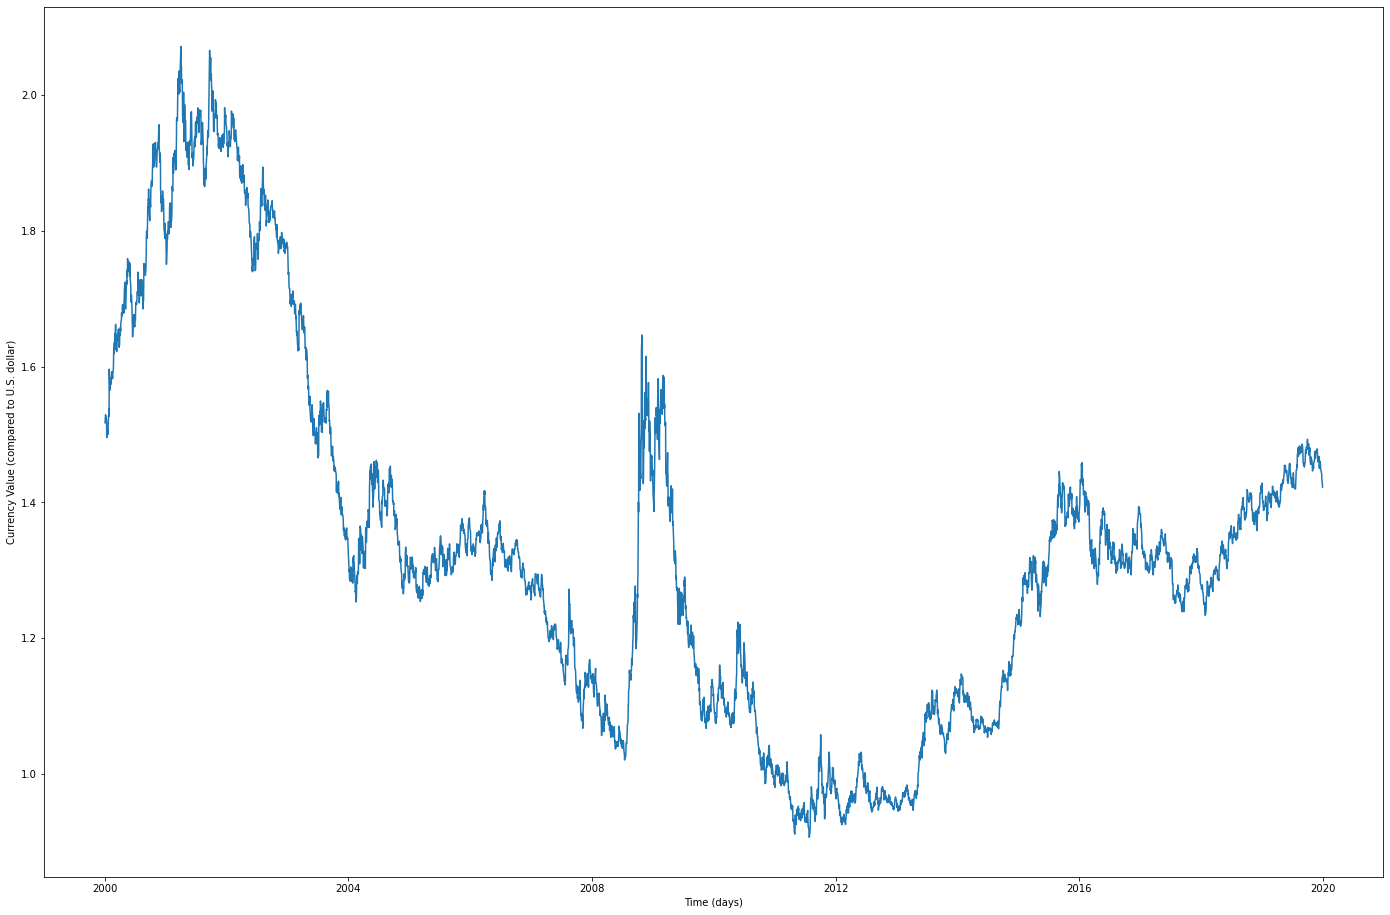

In [12]:
#Graph the daily currency exchange rates.

from matplotlib.pyplot import figure
#figure()


fig = plt.figure(figsize = (24, 16))
ax = plt.axes()


ax.set_xlabel('Time (days)')
ax.set_ylabel('Currency Value (compared to U.S. dollar)')

ax.plot(np.array(df_c['Date']), np.array(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));


In [13]:
#Change the period to monthly for the currency data.

month = df_c.Date.dt.to_period("M")
df_c_ag = df_c.groupby([df_c.Date.dt.to_period("M")]).mean()
df_c_ag.reset_index(inplace = True)
df_c_ag

,Date,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01,10.0,1.523624,0.987362,1.949876,0.609686,1.805443,1.448664,8.279229,7.779055,...,1.675602,7.349286,105.314048,3.800000,8.023143,8.490762,73.138095,1.590455,30.888095,37.384524
1,2000-02,31.0,1.593231,1.016433,2.039455,0.624881,1.776714,1.451407,8.278079,7.781640,...,1.702998,7.568169,109.463333,3.800000,8.235690,8.645952,73.548571,1.633745,30.804643,37.777857
2,2000-03,53.0,1.641087,1.037013,2.040430,0.632948,1.742378,1.460774,8.278561,7.784761,...,1.715343,7.722830,106.307391,3.800000,8.409996,8.697109,73.809565,1.663617,30.719783,37.922609
3,2000-04,74.5,1.677935,1.058630,2.016400,0.631990,1.769625,1.468875,8.279285,7.787990,...,1.709590,7.887180,105.627000,3.800000,8.627190,8.748615,74.122500,1.665650,30.520250,37.992750
4,2000-05,96.0,1.729843,1.102713,2.127717,0.663261,1.828141,1.496098,8.278059,7.790793,...,1.728798,8.223165,108.254783,3.800000,9.048065,9.088730,74.886739,1.717559,30.777609,38.963043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08,5118.5,1.476127,0.898605,1.554373,0.822405,4.021968,1.327314,7.062859,7.841986,...,1.384495,6.703373,106.188636,4.186486,8.965873,9.646714,177.938636,0.978736,31.388636,30.744091
236,2019-09,5140.0,1.468190,0.908302,1.576543,0.809319,4.120905,1.324386,7.116236,7.835329,...,1.379488,6.779110,107.470952,4.183295,9.010352,9.714479,180.745238,0.990474,31.087619,30.560238
237,2019-10,5162.0,1.471274,0.904413,1.578372,0.790335,4.084285,1.318926,7.095561,7.842167,...,1.370476,6.756257,108.160217,4.187389,9.150191,9.769626,181.308261,0.993237,30.700652,30.346739
238,2019-11,5184.0,1.465107,0.905219,1.563702,0.776257,4.160310,1.323833,7.019448,7.827840,...,1.361681,6.763752,108.897143,4.155264,9.151760,9.638464,180.344048,0.993293,30.465238,30.245238


In [14]:
#Pivot the labor data for Australia to have all data subsets as columns for faster iteration.

sam = df_l_a[['indicator', 'classif1', 'classif2', 'sex', 'time', 'obs_value']]

piv_l_a = sam.pivot_table(index = 'time', columns = ['indicator', 'classif1', 'classif2', 'sex'], values = 'obs_value')

piv_l_a

indicator   CPI_NCPD_COI_RT                     CPI_NCYR_COI_RT  \
classif1  COI_COMPONENT_FOO COI_COMPONENT_GEN COI_COMPONENT_FOO   
classif2               none              none              none   
sex                    none              none              none   
time                                                              
1950-03                 NaN              2.44               NaN   
1950-06                 NaN              2.38               NaN   
1950-09                 NaN              2.33               NaN   
1950-12                 NaN              4.55               NaN   
1951-03                 NaN              4.35               NaN   
...                     ...               ...               ...   
2020-03                2.72              0.34               7.4   
2020-04                 NaN               NaN               NaN   
2020-05                 NaN               NaN               NaN   
2020-06                 NaN               NaN               NaN   
2020-07                 NaN               NaN               NaN   

indicator                   EAP_DWA1_SEX_AGE_RT                    \
classif1  COI_COMPONENT_GEN AGE_AGGREGATE_TOTAL                     
classif2               none                none                     
sex                    none               SEX_F    SEX_M    SEX_T   
time                                                                
1950-03                7.69                 NaN      NaN      NaN   
1950-06                7.50                 NaN      NaN      NaN   
1950-09                7.32                 NaN      NaN      NaN   
1950-12               12.20                 NaN      NaN      NaN   
1951-03               14.29                 NaN      NaN      NaN   
...                     ...                 ...      ...      ...   
2020-03                2.19             61.2035  70.8075  65.9188   
2020-04                 NaN             58.4394  68.8889  63.5698   
2020-05                 NaN             57.5552  67.9472  62.6576   
2020-06                 NaN             59.2041  69.0975  64.0618   
2020-07                 NaN                 NaN      NaN      NaN   

indicator                                         ... UNE_TUNE_SEX_AGE_NB  \
classif1  AGE_AGGREGATE_Y15-24                    ... AGE_YTHADULT_Y15-24   
classif2                  none                    ...                none   
sex                      SEX_F    SEX_M    SEX_T  ...               SEX_T   
time                                              ...                       
1950-03                    NaN      NaN      NaN  ...                 NaN   
1950-06                    NaN      NaN      NaN  ...                 NaN   
1950-09                    NaN      NaN      NaN  ...                 NaN   
1950-12                    NaN      NaN      NaN  ...                 NaN   
1951-03                    NaN      NaN      NaN  ...                 NaN   
...                        ...      ...      ...  ...                 ...   
2020-03                68.6913  68.0716  68.3731  ...            282.6503   
2020-04                61.9023  63.1104  62.5226  ...            287.5416   
2020-05                59.4487  59.8336  59.6464  ...            291.7663   
2020-06                63.5264  63.1245  63.3201  ...            317.0817   
2020-07                    NaN      NaN      NaN  ...            333.3482   

indicator                                                             \
classif1  AGE_YTHADULT_Y15-64                     AGE_YTHADULT_YGE15   
classif2                 none                                   none   
sex                     SEX_F     SEX_M     SEX_T              SEX_F   
time                                                                   
1950-03                   NaN       NaN       NaN                NaN   
1950-06                   NaN       NaN       NaN                NaN   
1950-09                   NaN       NaN       NaN                NaN   
1950-12      

In [15]:
#Drop columns with little data or too low of a sample rate.

print(piv_l_a.shape[0]/4)
samp_l_a = piv_l_a[(piv_l_a.index > '1989-11') & (piv_l_a.index < '2020-01')].dropna(thresh = (piv_l_a[(piv_l_a.index > '1989-11') & (piv_l_a.index < '2020-01')].shape[0]/3) + 1, axis = 1)

samp_l_a

155.5


indicator EAP_DWA1_SEX_AGE_RT                                                  \
classif1  AGE_AGGREGATE_TOTAL                   AGE_AGGREGATE_Y15-24            
classif2                 none                                   none            
sex                     SEX_F    SEX_M    SEX_T                SEX_F    SEX_M   
time                                                                            
1989-12               51.7134  75.2734  63.3216              68.0419  74.3918   
1990-01               51.7789  75.5475  63.4898              69.4719  75.6684   
1990-02               52.2166  75.4223  63.6502              68.8577  74.9443   
1990-03               52.0308  75.3868  63.5384              68.4103  75.0286   
1990-04               51.9699  75.4974  63.5616              68.4346  75.3558   
...                       ...      ...      ...                  ...      ...   
2019-08               61.1980  71.2916  66.1539              67.5131  68.6560   
2019-09               61.2021  71.1311  66.0771              67.2505  67.9887   
2019-10               61.1747  70.9104  65.9545              68.1651  68.3074   
2019-11               61.1338  70.9152  65.9358              67.9172  67.9631   
2019-12               61.1472  70.9674  65.9679              68.9006  68.1846   

indicator                                                  \
classif1           AGE_AGGREGATE_Y25-54                     
classif2                           none                     
sex          SEX_T                SEX_F    SEX_M    SEX_T   
time                                                        
1989-12    71.2551              66.5876  93.2737  80.0183   
1990-01    72.6077              66.0518  93.2195  79.7246   
1990-02    71.9381              66.8306  93.1943  80.0972   
1990-03    71.7601              66.8188  93.0543  80.0224   
1990-04    71.9378              66.7560  93.2719  80.0916   
...            ...                  ...      ...      ...   
2019-08    68.0993              79.6271  91.0219  85.2545   
2019-09    67.6292              79.7194  90.9029  85.2392   
2019-10    68.2381              79.7500  90.6448  85.1290   
2019-11    67.9407              79.5904  90.7905  85.1212   
2019-12    68.5333              79.5402  90.7920  85.0963   

indicator                       ... UNE_TUNE_SEX_AGE_NB                      \
classif1  AGE_AGGREGATE_Y55-64  ... AGE_YTHADULT_Y15-24 AGE_YTHADULT_Y15-64   
classif2                  none  ...                none                none   
sex                      SEX_F  ...               SEX_T               SEX_F   
time                            ...                                           
1989-12                23.4032  ...            238.0267            224.1773   
1990-01                23.3491  ...            270.0335            239.2285   
1990-02                23.5992  ...            261.9378            281.3352   
1990-03                23.1964  ...            244.2482            249.3567   
1990-04                23.9663  ...            237.7392            236.2688   
...                        ...  ...                 ...                 ...   
2019-08                61.7344  ...            249.1399            325.0657   
2019-09                61.0784  ...            245.9571            301.9574   
2019-10                60.8478  ...            253.0242            307.2614   
2019-11                61.5183  ...            231.1233            298.1820   
2019-12                61.5592  ...            265.3407            293.3210   

indicator                                                             \
classif1                      AGE_YTHADULT_YGE15                       
classif2                                    none                       
sex           SEX_M     SEX_T              SEX_F     SEX_M     SEX_T   
time                                                                   
1989-12    275.6156  499.7929           224.3566  276.6074  500.9640   
1990-01    309.5738  548.8023

In [16]:
#Pivot the U.S. labor data.
sam_u = df_l_u[['indicator', 'classif1', 'classif2', 'sex', 'time', 'obs_value']]

piv_l_u = sam_u.pivot_table(index = 'time', columns = ['indicator', 'classif1', 'classif2', 'sex'], values = 'obs_value')

piv_l_u

indicator   CPI_ACPI_COI_RT                     CPI_MCPI_COI_RT  \
classif1  COI_COMPONENT_FOO COI_COMPONENT_GEN COI_COMPONENT_FOO   
classif2               none              none              none   
sex                    none              none              none   
time                                                              
1948-01                 NaN               NaN               NaN   
1948-02                 NaN               NaN               NaN   
1948-03                 NaN               NaN               NaN   
1948-04                 NaN               NaN               NaN   
1948-05                 NaN               NaN               NaN   
...                     ...               ...               ...   
2020-06                 NaN               NaN               NaN   
2020-07                 NaN               NaN               NaN   
2020-08                 NaN               NaN               NaN   
2020-09                 NaN               NaN               NaN   
2020-10                 NaN               NaN               NaN   

indicator                     CPI_NCPD_COI_RT                    \
classif1  COI_COMPONENT_GEN COI_COMPONENT_FOO COI_COMPONENT_GEN   
classif2               none              none              none   
sex                    none              none              none   
time                                                              
1948-01                 NaN               NaN               NaN   
1948-02                 NaN               NaN               NaN   
1948-03                 NaN               NaN               NaN   
1948-04                 NaN               NaN               NaN   
1948-05                 NaN               NaN               NaN   
...                     ...               ...               ...   
2020-06                 NaN              0.48              0.55   
2020-07                 NaN             -0.99              0.51   
2020-08                 NaN             -0.08              0.32   
2020-09                 NaN             -0.38              0.14   
2020-10                 NaN               NaN               NaN   

indicator   CPI_NCYR_COI_RT                   EAP_DWA1_SEX_AGE_RT        ...  \
classif1  COI_COMPONENT_FOO COI_COMPONENT_GEN AGE_AGGREGATE_TOTAL        ...   
classif2               none              none                none        ...   
sex                    none              none               SEX_F SEX_M  ...   
time                                                                     ...   
1948-01                 NaN               NaN                 NaN   NaN  ...   
1948-02                 NaN               NaN                 NaN   NaN  ...   
1948-03                 NaN               NaN                 NaN   NaN  ...   
1948-04                 NaN               NaN                 NaN   NaN  ...   
1948-05                 NaN               NaN                 NaN   NaN  ...   
...                     ...               ...                 ...   ...  ...   
2020-06                5.67              0.65                56.1  67.2  ...   
2020-07                4.64              0.99                56.0  67.1  ...   
2020-08                4.65              1.31                56.1  67.7  ...   
2020-09                4.08              1.37                55.6  67.6  ...   
2020-10                 NaN               NaN                55.9  67.8  ...   

indicator UNE_TUNE_SEX_AGE_NB                                             \
classif1  AGE_YTHADULT_Y15-24 AGE_YTHADULT_Y15-64                          
classif2                 none                none                          
sex                     SEX_T               SEX_F      SEX_M       SEX_T   
time                                                                       
1948-01              872.0000            560.0000  1695.0000   2255.0000   
1948-02             1049.0000            790.0000  1908.0000   2698.0000   
1948-03             1065.0000            

In [17]:
#Drop columns with too littel data for the U.S.

samp_l_u = piv_l_u[(piv_l_u.index > '1989-11') & (piv_l_u.index < '2020-01')].dropna(thresh = (piv_l_u[(piv_l_u.index > '1989-11') & (piv_l_u.index < '2020-01')].shape[0]/3) + 1, axis = 1)


#samp_l_u = piv_l_u[samp_l_a.columns]



samp_l_u

indicator   CPI_ACPI_COI_RT                     CPI_MCPI_COI_RT  \
classif1  COI_COMPONENT_FOO COI_COMPONENT_GEN COI_COMPONENT_FOO   
classif2               none              none              none   
sex                    none              none              none   
time                                                              
1989-12              5.5510            4.6473            0.3940   
1990-01              6.7103            5.2023            2.3548   
1990-02              6.8348            5.2632            0.6902   
1990-03              6.4777            5.2330            0.1523   
1990-04              5.7166            4.7116           -0.1521   
...                     ...               ...               ...   
2019-08                 NaN               NaN               NaN   
2019-09                 NaN               NaN               NaN   
2019-10                 NaN               NaN               NaN   
2019-11                 NaN               NaN               NaN   
2019-12                 NaN               NaN               NaN   

indicator                     CPI_NCPD_COI_RT                    \
classif1  COI_COMPONENT_GEN COI_COMPONENT_FOO COI_COMPONENT_GEN   
classif2               none              none              none   
sex                    none              none              none   
time                                                              
1989-12              0.1589              0.56              0.16   
1990-01              1.0309              3.56              1.03   
1990-02              0.4710              0.84              0.47   
1990-03              0.5469             -0.15              0.55   
1990-04              0.1554             -0.61              0.16   
...                     ...               ...               ...   
2019-08                 NaN             -0.09             -0.01   
2019-09                 NaN              0.16              0.08   
2019-10                 NaN              0.33              0.23   
2019-11                 NaN             -0.27             -0.05   
2019-12                 NaN              0.00             -0.09   

indicator   CPI_NCYR_COI_RT                   EAP_DWA1_SEX_AGE_RT        ...  \
classif1  COI_COMPONENT_FOO COI_COMPONENT_GEN AGE_AGGREGATE_TOTAL        ...   
classif2               none              none                none        ...   
sex                    none              none               SEX_F SEX_M  ...   
time                                                                     ...   
1989-12                6.21              4.65                57.5  76.4  ...   
1990-01                8.09              5.20                57.7  76.7  ...   
1990-02                8.28              5.26                57.6  76.6  ...   
1990-03                7.50              5.23                57.6  76.6  ...   
1990-04                6.15              4.71                57.5  76.4  ...   
...                     ...               ...                 ...   ...  ...   
2019-08                0.48              1.75                57.5  69.2  ...   
2019-09                0.59              1.71                57.6  69.2  ...   
2019-10                1.02              1.76                57.8  69.1  ...   
2019-11                0.99              2.05                57.5  69.3  ...   
2019-12                0.72              2.29                57.7  69.2  ...   

indicator UNE_TUNE_SEX_AGE_NB                                            \
classif1  AGE_YTHADULT_Y15-24 AGE_YTHADULT_Y15-64                         
classif2                 none                none                         
sex                     SEX_T               SEX_F      SEX_M      SEX_T   
time                                                                      
1989-12             2145.0000           2693.0000  3514.0000  6208.0000   
1990-01             2535.0000           3016.0000  4281.0000  7296.0000   
1990-02             2477.0000           3056.000

In [18]:
#Get an intersection of the common features for the labor data since not all measurements might exist in both sets

common_feat = list(set(samp_l_a.columns).intersection(samp_l_u.columns))
print(len(common_feat))

663


In [19]:
#Get a subset of data for Australia's labor data using the common features.

samp_l_a_r = samp_l_a[common_feat]
samp_l_a_r

indicator  EAP_TEAP_SEX_AGE_NB POP_XWAP_SEX_AGE_NB EMP_TEMP_SEX_STE_DT  \
classif1  AGE_10YRBANDS_Y25-34 AGE_10YRBANDS_YGE65   STE_AGGREGATE_SLF   
classif2                  none                none                none   
sex                      SEX_T               SEX_M               SEX_T   
time                                                                     
1989-12              2230.3210            796.3060                 NaN   
1990-01              2177.3412            798.4400                 NaN   
1990-02              2228.2113            800.4922                 NaN   
1990-03              2242.6212            802.5130                 NaN   
1990-04              2235.9310            804.3560                 NaN   
...                        ...                 ...                 ...   
2019-08              3209.3714           1899.9480             16.9633   
2019-09              3227.9619           1904.5170             16.6369   
2019-10              3215.3053           1910.3360             16.4992   
2019-11              3227.0929           1916.1470             16.7898   
2019-12              3242.8628           1921.9670             16.1703   

indicator UNE_DEAP_SEX_AGE_RT                     EAP_DWA1_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_YGE65 AGE_YTHADULT_YGE25 AGE_AGGREGATE_Y55-64   
classif2                 none               none                 none   
sex                     SEX_T              SEX_T                SEX_T   
time                                                                    
1989-12                1.1785             4.1136              42.8620   
1990-01                0.5654             4.4900              42.4834   
1990-02                1.5272             5.1718              42.6549   
1990-03                1.1943             4.7076              42.5638   
1990-04                0.6067             4.5813              43.0402   
...                       ...                ...                  ...   
2019-08                1.5630             4.0770              67.5838   
2019-09                1.4517             3.8939              67.3724   
2019-10                2.5491             3.7899              67.0302   
2019-11                1.7715             3.6823              67.3336   
2019-12                1.4925             3.5006              67.2945   

indicator EMP_TEMP_SEX_AGE_NB EIP_DWAP_SEX_AGE_RT UNE_TUNE_SEX_AGE_NB  \
classif1  AGE_YTHADULT_Y15-64 AGE_10YRBANDS_TOTAL  AGE_YTHADULT_YGE15   
classif2                 none                none                none   
sex                     SEX_T               SEX_M               SEX_F   
time                                                                    
1989-12             7837.3228             23.7073            224.3566   
1990-01             7620.9431             24.6276            239.3672   
1990-02             7711.2403             24.3735            282.0758   
1990-03             7780.1450             24.4366            250.3086   
1990-04             7788.5973             24.4162            236.7316   
...                       ...                 ...                 ...   
2019-08            12259.8750             29.0692            329.2311   
2019-09            12327.9316             28.9681            304.8658   
2019-10            12311.5744             29.3561            310.4837   
2019-11            12362.2633             29.1597            298.3941   
2019-12            12487.6978             28.6259            295.1189   

indicator  POP_XWAP_SEX_AGE_NB  ... EIP_DWAP_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_Y15-24  ...  AGE_YTHADULT_YGE15   
classif2                  none  ...                none   
sex                      SEX_M  ...               SEX_F   
time                            ...                       
1989-12              1381.2241  ...             47.4693   
1990-01              1381.7430  ...             49.4408   
1990-02              1382.2645  ...             47.7812   
1990-

In [20]:
#Avoid ambiguities when we later normalize the reduced data for Australia.

samp_l_a_r_n = samp_l_a_r.copy()
#samp_l_a_r_n = pd.DataFrame()
samp_l_a_r_n

indicator  EAP_TEAP_SEX_AGE_NB POP_XWAP_SEX_AGE_NB EMP_TEMP_SEX_STE_DT  \
classif1  AGE_10YRBANDS_Y25-34 AGE_10YRBANDS_YGE65   STE_AGGREGATE_SLF   
classif2                  none                none                none   
sex                      SEX_T               SEX_M               SEX_T   
time                                                                     
1989-12              2230.3210            796.3060                 NaN   
1990-01              2177.3412            798.4400                 NaN   
1990-02              2228.2113            800.4922                 NaN   
1990-03              2242.6212            802.5130                 NaN   
1990-04              2235.9310            804.3560                 NaN   
...                        ...                 ...                 ...   
2019-08              3209.3714           1899.9480             16.9633   
2019-09              3227.9619           1904.5170             16.6369   
2019-10              3215.3053           1910.3360             16.4992   
2019-11              3227.0929           1916.1470             16.7898   
2019-12              3242.8628           1921.9670             16.1703   

indicator UNE_DEAP_SEX_AGE_RT                     EAP_DWA1_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_YGE65 AGE_YTHADULT_YGE25 AGE_AGGREGATE_Y55-64   
classif2                 none               none                 none   
sex                     SEX_T              SEX_T                SEX_T   
time                                                                    
1989-12                1.1785             4.1136              42.8620   
1990-01                0.5654             4.4900              42.4834   
1990-02                1.5272             5.1718              42.6549   
1990-03                1.1943             4.7076              42.5638   
1990-04                0.6067             4.5813              43.0402   
...                       ...                ...                  ...   
2019-08                1.5630             4.0770              67.5838   
2019-09                1.4517             3.8939              67.3724   
2019-10                2.5491             3.7899              67.0302   
2019-11                1.7715             3.6823              67.3336   
2019-12                1.4925             3.5006              67.2945   

indicator EMP_TEMP_SEX_AGE_NB EIP_DWAP_SEX_AGE_RT UNE_TUNE_SEX_AGE_NB  \
classif1  AGE_YTHADULT_Y15-64 AGE_10YRBANDS_TOTAL  AGE_YTHADULT_YGE15   
classif2                 none                none                none   
sex                     SEX_T               SEX_M               SEX_F   
time                                                                    
1989-12             7837.3228             23.7073            224.3566   
1990-01             7620.9431             24.6276            239.3672   
1990-02             7711.2403             24.3735            282.0758   
1990-03             7780.1450             24.4366            250.3086   
1990-04             7788.5973             24.4162            236.7316   
...                       ...                 ...                 ...   
2019-08            12259.8750             29.0692            329.2311   
2019-09            12327.9316             28.9681            304.8658   
2019-10            12311.5744             29.3561            310.4837   
2019-11            12362.2633             29.1597            298.3941   
2019-12            12487.6978             28.6259            295.1189   

indicator  POP_XWAP_SEX_AGE_NB  ... EIP_DWAP_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_Y15-24  ...  AGE_YTHADULT_YGE15   
classif2                  none  ...                none   
sex                      SEX_M  ...               SEX_F   
time                            ...                       
1989-12              1381.2241  ...             47.4693   
1990-01              1381.7430  ...             49.4408   
1990-02              1382.2645  ...             47.7812   
1990-

In [21]:
#We make the new columns of samp_l_a_r_n that contain the relative values as compared to the U.S. data.
#I.E. they contain and elementwise division of the Australian data by the U.S. data.


print(samp_l_a_r.loc[:,[('UNE_TUNE_SEX_AGE_NB', 'AGE_AGGREGATE_TOTAL', 'none', 'SEX_T')]])


for i in common_feat:
    samp_l_a_r_n.loc[:,i] = np.divide(np.array(samp_l_a_r_n.loc[:,i]), np.array(samp_l_u.loc[:,i]))
    #samp_l_a_r_n.loc[:,i] = np.divide(np.array(samp_l_a_r_n[i]), np.array(samp_l_u[i]))
    


indicator UNE_TUNE_SEX_AGE_NB
classif1  AGE_AGGREGATE_TOTAL
classif2                 none
sex                     SEX_T
time                         
1989-12              500.9640
1990-01              549.2956
1990-02              592.6760
1990-03              547.9221
1990-04              533.1808
...                       ...
2019-08              714.4402
2019-09              691.5440
2019-10              685.3369
2019-11              653.9052
2019-12              666.7489

[361 rows x 1 columns]


<ipython-input-21-a441635fb059>:9: RuntimeWarning: divide by zero encountered in true_divide
  samp_l_a_r_n.loc[:,i] = np.divide(np.array(samp_l_a_r_n.loc[:,i]), np.array(samp_l_u.loc[:,i]))


In [22]:
samp_l_a_r

indicator  EAP_TEAP_SEX_AGE_NB POP_XWAP_SEX_AGE_NB EMP_TEMP_SEX_STE_DT  \
classif1  AGE_10YRBANDS_Y25-34 AGE_10YRBANDS_YGE65   STE_AGGREGATE_SLF   
classif2                  none                none                none   
sex                      SEX_T               SEX_M               SEX_T   
time                                                                     
1989-12              2230.3210            796.3060                 NaN   
1990-01              2177.3412            798.4400                 NaN   
1990-02              2228.2113            800.4922                 NaN   
1990-03              2242.6212            802.5130                 NaN   
1990-04              2235.9310            804.3560                 NaN   
...                        ...                 ...                 ...   
2019-08              3209.3714           1899.9480             16.9633   
2019-09              3227.9619           1904.5170             16.6369   
2019-10              3215.3053           1910.3360             16.4992   
2019-11              3227.0929           1916.1470             16.7898   
2019-12              3242.8628           1921.9670             16.1703   

indicator UNE_DEAP_SEX_AGE_RT                     EAP_DWA1_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_YGE65 AGE_YTHADULT_YGE25 AGE_AGGREGATE_Y55-64   
classif2                 none               none                 none   
sex                     SEX_T              SEX_T                SEX_T   
time                                                                    
1989-12                1.1785             4.1136              42.8620   
1990-01                0.5654             4.4900              42.4834   
1990-02                1.5272             5.1718              42.6549   
1990-03                1.1943             4.7076              42.5638   
1990-04                0.6067             4.5813              43.0402   
...                       ...                ...                  ...   
2019-08                1.5630             4.0770              67.5838   
2019-09                1.4517             3.8939              67.3724   
2019-10                2.5491             3.7899              67.0302   
2019-11                1.7715             3.6823              67.3336   
2019-12                1.4925             3.5006              67.2945   

indicator EMP_TEMP_SEX_AGE_NB EIP_DWAP_SEX_AGE_RT UNE_TUNE_SEX_AGE_NB  \
classif1  AGE_YTHADULT_Y15-64 AGE_10YRBANDS_TOTAL  AGE_YTHADULT_YGE15   
classif2                 none                none                none   
sex                     SEX_T               SEX_M               SEX_F   
time                                                                    
1989-12             7837.3228             23.7073            224.3566   
1990-01             7620.9431             24.6276            239.3672   
1990-02             7711.2403             24.3735            282.0758   
1990-03             7780.1450             24.4366            250.3086   
1990-04             7788.5973             24.4162            236.7316   
...                       ...                 ...                 ...   
2019-08            12259.8750             29.0692            329.2311   
2019-09            12327.9316             28.9681            304.8658   
2019-10            12311.5744             29.3561            310.4837   
2019-11            12362.2633             29.1597            298.3941   
2019-12            12487.6978             28.6259            295.1189   

indicator  POP_XWAP_SEX_AGE_NB  ... EIP_DWAP_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_Y15-24  ...  AGE_YTHADULT_YGE15   
classif2                  none  ...                none   
sex                      SEX_M  ...               SEX_F   
time                            ...                       
1989-12              1381.2241  ...             47.4693   
1990-01              1381.7430  ...             49.4408   
1990-02              1382.2645  ...             47.7812   
1990-

In [23]:
samp_l_a_r_n

indicator  EAP_TEAP_SEX_AGE_NB POP_XWAP_SEX_AGE_NB EMP_TEMP_SEX_STE_DT  \
classif1  AGE_10YRBANDS_Y25-34 AGE_10YRBANDS_YGE65   STE_AGGREGATE_SLF   
classif2                  none                none                none   
sex                      SEX_T               SEX_M               SEX_T   
time                                                                     
1989-12               0.061885            0.064962                 NaN   
1990-01               0.060299            0.066698                 NaN   
1990-02               0.061732            0.066853                 NaN   
1990-03               0.062304            0.066926                 NaN   
1990-04               0.062258            0.066952                 NaN   
...                        ...                 ...                 ...   
2019-08               0.086219            0.079567            2.743228   
2019-09               0.086538            0.079529            2.698999   
2019-10               0.085511            0.079633            2.679181   
2019-11               0.085760            0.079623            2.750397   
2019-12               0.086284            0.079593            2.699730   

indicator UNE_DEAP_SEX_AGE_RT                     EAP_DWA1_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_YGE65 AGE_YTHADULT_YGE25 AGE_AGGREGATE_Y55-64   
classif2                 none               none                 none   
sex                     SEX_T              SEX_T                SEX_T   
time                                                                    
1989-12              0.436481           1.028400             0.763230   
1990-01              0.161543           0.935417             0.763331   
1990-02              0.424222           1.100383             0.768403   
1990-03              0.373219           1.069909             0.768160   
1990-04              0.195710           1.117390             0.779608   
...                       ...                ...                  ...   
2019-08              0.500416           1.319332             1.031157   
2019-09              0.604799           1.451918             1.025483   
2019-10              1.008227           1.385197             1.024732   
2019-11              0.625287           1.356830             1.029053   
2019-12              0.579139           1.260070             1.033502   

indicator EMP_TEMP_SEX_AGE_NB EIP_DWAP_SEX_AGE_RT UNE_TUNE_SEX_AGE_NB  \
classif1  AGE_YTHADULT_Y15-64 AGE_10YRBANDS_TOTAL  AGE_YTHADULT_YGE15   
classif2                 none                none                none   
sex                     SEX_T               SEX_M               SEX_F   
time                                                                    
1989-12              0.068540            0.982421            0.082032   
1990-01              0.067023            1.011982            0.077919   
1990-02              0.067682            1.002130            0.090846   
1990-03              0.067906            1.012132            0.086135   
1990-04              0.067868            1.011987            0.083151   
...                       ...                 ...                 ...   
2019-08              0.083172            0.951728            0.105358   
2019-09              0.083334            0.936288            0.117330   
2019-10              0.082958            0.949415            0.119272   
2019-11              0.083404            0.942581            0.116999   
2019-12              0.084536            0.915484            0.119451   

indicator  POP_XWAP_SEX_AGE_NB  ... EIP_DWAP_SEX_AGE_RT  \
classif1  AGE_10YRBANDS_Y15-24  ...  AGE_YTHADULT_YGE15   
classif2                  none  ...                none   
sex                      SEX_M  ...               SEX_F   
time                            ...                       
1989-12               0.087725  ...            1.116980   
1990-01               0.082399  ...            1.154358   
1990-02               0.082523  ...            1.116876   
1990-

5217


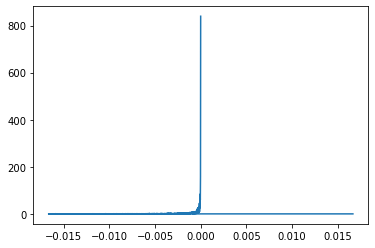

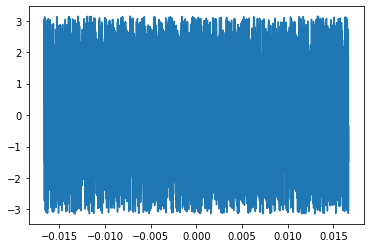

In [24]:
#We look at a graph of the prevailing frequencies in traded value of the Australian Dollar.

import pylab
mag = np.fft.fft(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
freq = np.fft.fftfreq(len(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$']), 30)

not0 = [i for i in mag if i != 0]
print(len(not0))
  
pylab.figure()
pylab.plot( freq[int(len(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])/2):], np.abs(mag[int(len(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])/2):]) )
#pylab.plot(freq, np.abs(mag))

pylab.figure()
pylab.plot(freq, np.angle(mag) )
pylab.show()

Note that we found no obvious prevailing frequencies but further resampling or cleaning of data may still yeild useful data. This will be left for future project.

The cell below will create a list of 'gaps' which will then be used to create differentials in time. Subsequently it will take the normalized labor data for Australia and make vectors for each labor cagory with each time gap. Then it will check for linear correlation between the monthly labor value (delayed by the gap number of months) and the currency exchange rates. These will then be exported to a dataframe.

The logic of using the linear corellation is that it should select for features that can be approximated by the same order functions. That is to say features in the labor data where the currenc exhange data can be predicted from it via multiplication of a constant and possibly the addition of a constant. 

The resulting data frame was exported and the funtion commented out to avoid running it every time. The data is available in the repository.

In [25]:
#Below ivar is the independent variable while dvar is dependent.

results = []
gaps = np.arange(0,120,1)
#count = 0
count = 0
#for gap in gaps:
#    for k in samp_l_a_r_n.iteritems():
   
#        count += 1
            

         
#        ivar = k[1][gap:240 + gap] 
        
#        dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])

#        slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar),dvar)

#        results.append([k[0][0], k[0][1], k[0][2], k[0][3], gap, slope, intercept, r_value, p_value, std_err])

#print(time.time(), count)


In [26]:
#df_out = pd.DataFrame(results)
#df_out.columns = ['indicator', 'classif1', 'classif2', 'sex', 'gap', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
#df_out

In [27]:
#Below we get the data frame to find of the linear correlations of the staggered labor data and currency exchange data.

df_out = pd.read_csv('gaps_results.csv')
df_out.dropna(inplace = True)
#df_out = df_out[df_out['r_value'] >= 0.85]
df_out

,Unnamed: 0,indicator,classif1,classif2,sex,gap,slope,intercept,r_value,p_value,std_err
0,0,UNE_TUNE_SEX_AGE_NB,AGE_AGGREGATE_Y25-54,none,SEX_T,0,-1.297894,1.440159,-0.108373,9.391969e-02,0.771730
3,3,EAP_TEAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,none,SEX_T,0,-2.442921,1.499235,-0.019907,7.589768e-01,7.952795
4,4,EAP_TEA1_SEX_AGE_NB,AGE_YTHADULT_YGE15,none,SEX_T,0,-2.994751,1.536914,-0.023282,7.197083e-01,8.335550
6,6,EMP_TEMP_SEX_AGE_NB,AGE_AGGREGATE_Y25-54,none,SEX_M,0,2.231808,1.178392,0.020415,7.530324e-01,7.084947
7,7,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,none,SEX_T,0,-55.905740,5.318319,-0.191242,2.932360e-03,18.599212
...,...,...,...,...,...,...,...,...,...,...,...
80218,80218,UNE_TUNE_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,none,SEX_F,120,2.177472,1.116221,0.252387,7.693502e-05,0.541133
80219,80219,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y35-44,none,SEX_M,120,-27.116114,3.387587,-0.610438,6.752765e-26,2.280643
80220,80220,EMP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y25-34,none,SEX_T,120,-6.073004,7.460525,-0.823343,1.772725e-60,0.271352
80221,80221,UNE_TUNE_SEX_AGE_DUR_NB,AGE_YTHADULT_YGE15,DUR_AGGREGATE_MLT6,SEX_F,120,0.934171,1.265597,0.061028,3.465074e-01,0.990371


In [28]:
#We examine the top most linearly correlated delayed labor values.

df_top = df_out.nlargest(100, 'r_value')
df_top

,Unnamed: 0,indicator,classif1,classif2,sex,gap,slope,intercept,r_value,p_value,std_err
66002,66002,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_T,99,0.661576,0.671404,0.922033,4.500741e-100,0.018005
66665,66665,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_T,100,0.664994,0.669227,0.921038,1.915203e-99,0.018228
68010,68010,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_M,102,0.574508,0.772083,0.920501,4.151209e-99,0.015808
68673,68673,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_M,103,0.580376,0.768242,0.920287,5.643303e-99,0.015994
67328,67328,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_T,101,0.669596,0.666055,0.920228,6.142636e-99,0.018460
...,...,...,...,...,...,...,...,...,...,...,...
67891,67891,UNE_TUN1_SEX_AGE_NB,AGE_YTHADULT_YGE25,none,SEX_M,102,8.263012,0.749409,0.904925,2.827032e-90,0.251888
64724,64724,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_TOTAL,none,SEX_M,97,0.627036,0.687663,0.904884,2.968515e-90,0.019119
64889,64889,UNE_DEA1_SEX_AGE_RT,AGE_YTHADULT_YGE15,none,SEX_M,97,0.627036,0.687663,0.904884,2.968722e-90,0.019119
63350,63350,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,none,SEX_T,95,0.632202,0.695776,0.904758,3.449520e-90,0.019292


Below we will look at the cross correlation between columns in most linearly correlated labor data.

In [29]:
#We get the correlation matrix.

vals = df_top[['indicator', 'classif1', 'classif2', 'sex']].drop_duplicates()
cors = samp_l_a_r_n[vals.values].corr()

#cors

np.fill_diagonal(cors.values, np.nan)
#cors_u = pd.DataFrame(np.triu(cors,1), columns = cors.columns, index = cors.index )
cors = cors.where(np.triu(np.ones(cors.shape)).astype(bool))
cors_u = cors[cors >= -.01]
#cors_u
names = [tuple(list(i) + ['cors']) for i in cors_u.columns]

cors_u.columns = pd.MultiIndex.from_tuples(names, names = cors.index.names + ['correlation'])

cors_u = cors_u.stack([0,1,2,3])


#cors_u[cors_u.index.duplicated()]

#cors_u


In [30]:

min_cor = cors_u.nsmallest(20, 'cors')
min_cor.drop_duplicates(['cors'], inplace = True)
#min_cor

In [31]:
min_min = min_cor[np.abs(min_cor) <= min(np.abs(min_cor.cors)*2)]
min_min.dropna(inplace = True)
#min_min.unstack([0,1,2])
#min_min.droplevel(0)
min_min.head()

correlation                                                                                                          cors
indicator           classif1             classif2 sex   indicator           classif1             classif2 sex            
UNE_TUN1_SEX_AGE_NB AGE_AGGREGATE_Y25-54 none     SEX_M UNE_DEAP_SEX_AGE_RT AGE_10YRBANDS_Y25-34 none     SEX_M  0.929326
UNE_DEAP_SEX_AGE_RT AGE_10YRBANDS_Y25-34 none     SEX_M UNE_DEA1_SEX_AGE_RT AGE_YTHADULT_YGE15   none     SEX_T  0.936253
                                                                            AGE_AGGREGATE_TOTAL  none     SEX_T  0.936253
UNE_TUN1_SEX_AGE_NB AGE_YTHADULT_YGE25   none     SEX_M UNE_DEAP_SEX_AGE_RT AGE_10YRBANDS_Y25-34 none     SEX_M  0.944352
UNE_DEAP_SEX_AGE_RT AGE_10YRBANDS_Y25-34 none     SEX_T UNE_TUN1_SEX_AGE_NB AGE_AGGREGATE_Y25-54 none     SEX_M  0.947625

We see above the minimum cross correlation between the features of the labor data most linearly correlated to the currency exchange data. The minimum correlation is .93 which is extremely high. This leads to two issues. The first issue is that one must try to avoid high colinearity when tring to make predictions. The second issue is that this implies the possible existence of a variable that may predict both the labor data and the currency exchange rates. 

Below we begin exploratory PCA analysis

In [32]:
#Below we will take the most linearly correlated value for labor data for each primary indicator.

#Below the number of columns of data for each primary indicator in the labor data will be deisgnated "th".

th = 3

coln = []
gapsn = []
varsn = []
ccoln = []
ccoln2 = []



#def get_large_col(dfin, col_out, vout, ):
#    for

for i in df_out['indicator'].unique():
    if df_out[df_out['indicator'] == i].shape[0] >= th:
        for k in df_out[df_out['indicator'] == i].nlargest(th,'r_value').iterrows():
            coln.append(np.array(k[1][1:6]))
            gapsn.append(k[1][5])
    else:
        for k in df_out[df_out['indicator'] == i].nlargest(df_out[df_out['indicator'] == i].shape[0],'r_value').iterrows():
            coln.append(np.array(k[1][1:6]))
            gapsn.append(k[1][5])
        
        #ccoln.append(np.array(np.array(samp_l_a_r_n[tuple(i[1])[1:5]]) - np.mean(np.array(samp_l_a_r_n[tuple(i[1])[1:5]]))))

#gapsn, coln, varsn = gapsn.pop(31), coln, varsn

#for i in zip(coln, gapsn):
for i in coln:
    varsn.append(np.array(samp_l_a_r_n[tuple(i[0:4])])[i[4]:i[4] + 240])
    ccoln.append(np.array(np.array(samp_l_a_r_n[tuple(i[0:4])]) - np.mean(np.array(samp_l_a_r_n[tuple(i[0:4])]))))
    ccoln2.append(np.array(np.array(samp_l_a_r_n[tuple(i[0:4])])[i[4]:i[4] + 240] - np.mean(np.array(samp_l_a_r_n[tuple(i[0:4])])[i[4]:i[4] + 240])))    
        
print(len(gapsn), len(coln), len(varsn), len(ccoln[0]), len(ccoln2[0]), len(df_out['indicator'].unique()))

63 63 63 361 240 21


In [33]:
#Make a dataframe of the most useful data procured in the above frame.
df_fpca = pd.DataFrame(varsn)
df_fpca = df_fpca.T
df_fpca.columns = [tuple(i) for i in coln]
#df_fpca.drop(columns = df_fpca.columns[31], axis = 1, inplace = True)

df_fpca.dropna(axis =1, inplace = True)
#df_fpca = df_fpca.loc[:,~df_fpca.columns.duplicated()]
df_fpca



,"(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_T, 98)","(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_T, 99)","(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_M, 98)","(EAP_TEAP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 43)","(EAP_TEAP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 44)","(EAP_TEAP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 42)","(EAP_TEA1_SEX_AGE_NB, AGE_YTHADULT_Y15-24, none, SEX_F, 0)","(EAP_TEA1_SEX_AGE_NB, AGE_AGGREGATE_Y15-24, none, SEX_F, 0)","(EAP_TEA1_SEX_AGE_NB, AGE_AGGREGATE_Y15-24, none, SEX_T, 0)","(EMP_TEMP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 0)",...,"(EMP_TEMP_SEX_STE_DT, STE_AGGREGATE_EES, none, SEX_M, 15)","(EES_TEES_SEX_ECO_NB, ECO_SECTOR_TOTAL, none, SEX_M, 13)","(EES_TEES_SEX_ECO_NB, ECO_SECTOR_TOTAL, none, SEX_M, 14)","(EES_TEES_SEX_ECO_NB, ECO_SECTOR_TOTAL, none, SEX_M, 15)","(EMP_TEMP_SEX_STE_NB, STE_AGGREGATE_EES, none, SEX_M, 13)","(EMP_TEMP_SEX_STE_NB, STE_AGGREGATE_EES, none, SEX_M, 14)","(EMP_TEMP_SEX_STE_NB, STE_AGGREGATE_EES, none, SEX_M, 15)","(EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24, JOB_TIME_FULL, SEX_F, 49)","(EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24, JOB_TIME_FULL, SEX_F, 50)","(EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24, JOB_TIME_FULL, SEX_F, 51)"
0,0.107657,0.102356,0.118381,0.073797,0.073638,0.074431,0.089901,0.089901,0.089974,0.073180,...,0.866272,0.061537,0.061595,0.061366,0.061537,0.061595,0.061366,0.103648,0.100160,0.101772
1,0.102356,0.124492,0.116169,0.073638,0.074039,0.073797,0.087859,0.087859,0.086993,0.074068,...,0.870194,0.061595,0.061366,0.060930,0.061595,0.061366,0.060930,0.100160,0.101772,0.097243
2,0.124492,0.128533,0.143484,0.074039,0.073715,0.073638,0.087398,0.087398,0.086410,0.074683,...,0.858311,0.061366,0.060930,0.059712,0.061366,0.060930,0.059712,0.101772,0.097243,0.091631
3,0.128533,0.115788,0.170333,0.073715,0.073649,0.074039,0.086243,0.086243,0.085950,0.074703,...,0.862872,0.060930,0.059712,0.058779,0.060930,0.059712,0.058779,0.097243,0.091631,0.077235
4,0.115788,0.110837,0.155910,0.073649,0.073435,0.073715,0.087187,0.087187,0.086574,0.075021,...,0.848495,0.059712,0.058779,0.056711,0.059712,0.058779,0.056711,0.091631,0.077235,0.077024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.096598,0.087653,0.102227,0.074412,0.074473,0.073591,0.095458,0.095458,0.096662,0.072140,...,0.845106,0.067322,0.069522,0.069430,0.067322,0.069522,0.069430,0.074437,0.083228,0.081743
236,0.087653,0.094427,0.088267,0.074473,0.073355,0.074412,0.096193,0.096193,0.097418,0.070915,...,0.835500,0.069522,0.069430,0.069123,0.069522,0.069430,0.069123,0.083228,0.081743,0.084236
237,0.094427,0.090469,0.095356,0.073355,0.073471,0.074473,0.098657,0.098657,0.099014,0.072659,...,0.838204,0.069430,0.069123,0.070680,0.069430,0.069123,0.070680,0.081743,0.084236,0.086086
238,0.090469,0.090940,0.085966,0.073471,0.073395,0.073355,0.101082,0.101082,0.100179,0.071638,...,0.846122,0.069123,0.070680,0.071119,0.069123,0.070680,0.071119,0.084236,0.086086,0.095238


In [34]:
#Below is a custom PCA fuction, this is purely to compare the results to those of the PCA function in sklearn.
#It was also for fun.

def pca(Y):
    X = Y.copy()
    #Get centered columns.
    for i in X.columns:
        X[i] = (np.array(X[i]) - np.mean(np.array(X[i])))
        #X[i] = (np.array(X[i]) - np.mean(np.array(X[i])))/np.abs(np.std(X[i]))      
    #for i in X.values:
        #i = np.array(i) - np.mean(np.array(i))       

  # Data matrix X, now zero centered.
    n, m = X.shape
    print(n,m)
    
  # Obtain the covariance matrix using numpy or pandas fuctions.
    C = np.dot(X.T, X) / (n-1)

    #C = X.cov()

  # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    comp = sorted(zip(eigen_vals, eigen_vecs.T), key = lambda x: x[0], reverse = True)
    e_sort = np.array(list(zip(*comp))[1])
    
    
    
  # Get usable values by transforming X



    X_pca = np.dot(-np.linalg.inv(eigen_vecs), X.T)


    return X_pca, eigen_vals, eigen_vecs, e_sort

In [35]:
#Do PCA with the custom function.

pav = pca(df_fpca)
#pav = pca()

240 63


In [36]:
#We order the eigenvectors by their magnitude. This is to examine potential differences in the returns from the 
#custom built and sklearn PCA functions. The sklearn function order the principle components (eigenvectors) by the magnitude of the eigenvalues.
#

df_eig = pd.DataFrame(pca(df_fpca)[1])
#df_eig.index = df_fpca.columns
#df_eig = df_eig[np.abs(df_eig[0]) >= .5]
df_eig.reset_index(inplace = True)
df_eig.columns = ['order', 0]
df_eig.sort_values(0, ascending =  False, inplace = True)

#df_eig = df_eig.T
#df_eig = df_eig[df_eig.loc[::,0] > = 1]


df_eig

print(list(df_eig['order']))

240 63
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 61]


In [37]:
#print(df_eig)

In [38]:
#We make a dataframe of the customs PCA function's eigenvectors (components)

dec_df = pd.DataFrame(pav[2])
dec_df = dec_df.T
#dec_df.columns = df_fpca.columns
dec_df = dec_df.reindex(list(df_eig['order']))
dec_df.reset_index(inplace = True, drop = True)
dec_df.dropna(axis = 1, inplace = True)
#dec_df.drop([0], inplace = True)

#dec_df



#print(dec_df.columns)

In [39]:
#df_cent = pd.DataFrame(ccoln2)
#df_cent = df_cent.T
#df_cent.columns = [tuple(i) for i in coln]
#df_fpca.drop(columns = df_fpca.columns[31], axis = 1, inplace = True)
#np.array(list(zip(coln, gapsn)))
#df_cent
#print(df_fpca.columns[31])



In [40]:
#Do PCA using the sklearn function.

from sklearn.decomposition import PCA
chk = PCA()
#chk.fit(df_fpca.copy())
chk.fit(df_fpca)


PCA()

In [41]:
#stn_cmp = np.dot(chk.components_, df_fpca.T)
stn_cmp = chk.fit_transform(df_fpca.values).T
print(len(stn_cmp))

63


In [42]:
#Make a data frame of the sklearn principle components (PCs).

df_chk = pd.DataFrame(chk.components_)
df_chk.index = df_fpca.columns
df_chk.head()

#Print(chk.explained_variance_)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
"(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_T, 98)",0.025048,0.025112,0.034374,0.002524,0.002522,0.002528,0.001670,0.001670,0.001685,0.002269,...,0.008774,0.000439,0.000399,0.000352,0.000438,0.000398,0.000351,0.003173,0.003007,0.002744
"(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_T, 99)",0.015626,0.012365,0.006670,0.001284,0.001729,0.000679,0.024105,0.024105,0.023224,-0.008828,...,0.016076,0.022025,0.022828,0.023554,0.022079,0.022890,0.023623,0.046893,0.050738,0.054533
"(UNE_TUNE_SEX_AGE_NB, AGE_10YRBANDS_Y25-34, none, SEX_M, 98)",0.030026,0.059549,0.006079,0.001466,0.001835,0.001599,0.005580,0.005580,0.006193,-0.003736,...,0.005009,0.009416,0.008762,0.009654,0.009404,0.008744,0.009629,0.016348,0.011018,0.011498
"(EAP_TEAP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 43)",0.018211,0.018575,-0.040333,0.003895,0.003767,0.003388,0.016492,0.016492,0.016791,0.001408,...,0.005679,0.013686,0.014419,0.013992,0.013636,0.014370,0.013948,-0.009774,-0.006959,-0.013053
"(EAP_TEAP_SEX_AGE_NB, AGE_10YRBANDS_Y45-54, none, SEX_M, 44)",-0.013622,-0.016489,-0.011630,-0.001396,-0.001863,-0.000047,-0.006323,-0.006323,-0.006355,-0.000577,...,-0.006031,-0.004456,-0.007640,-0.007784,-0.004495,-0.007627,-0.007809,0.005923,-0.011204,-0.019839


In [43]:
#Get the explained variance of each of the transformed space PCs for the custom function

mags = [np.var(x) for x in pav[0]]
e_var_hm = [x/sum(mags) for x in mags]

 

In [44]:
#Get the explained variances using the sklearn model.

e_var_sk = chk.explained_variance_ratio_
print(e_var_sk)

[9.54964121e-01 1.35965964e-02 8.99384762e-03 4.99557623e-03
 4.48269658e-03 2.93727999e-03 2.36850906e-03 2.10158886e-03
 1.44683859e-03 1.35972939e-03 8.89298008e-04 5.21736217e-04
 3.95920074e-04 3.11361219e-04 1.40056417e-04 1.05329251e-04
 6.29692708e-05 5.14636564e-05 4.63472540e-05 4.28098608e-05
 3.33481867e-05 2.46062893e-05 1.97133457e-05 1.82037676e-05
 1.34743674e-05 1.09660501e-05 1.06214900e-05 8.89314191e-06
 7.52790871e-06 6.49438425e-06 6.20411052e-06 4.72643622e-06
 4.27057815e-06 3.68245356e-06 3.00737687e-06 1.67680049e-06
 1.56155370e-06 1.14586441e-06 9.56156104e-07 8.60133506e-07
 8.03027247e-07 7.66456679e-07 5.83329801e-07 4.96267844e-07
 4.00236583e-07 1.85157177e-07 1.57015917e-07 1.29992924e-07
 9.48493638e-08 9.42453325e-08 8.77521676e-08 7.55719592e-08
 5.59257770e-08 2.12917802e-08 1.51226361e-08 1.08915461e-08
 6.58563559e-09 4.56046990e-10 2.18964011e-10 1.01367634e-10
 4.57967355e-14 8.73708313e-33 8.73708313e-33]


In [45]:
#print(np.divide(e_var_hm, e_var_sk))

#print(np.divide(np.ascontiguousarray(chk.components_)[len(chk.components_) - 5:], pav[3][len(pav[3]) - 5:]))
#print(np.divide(np.ascontiguousarray(chk.components_)[len(chk.components_) - 2], pav[3][len(pav[3]) - 1:]))

#print(np.ascontiguousarray(chk.components_)[len(chk.components_) - 2], pav[2][len(pav[2]) - 1:])





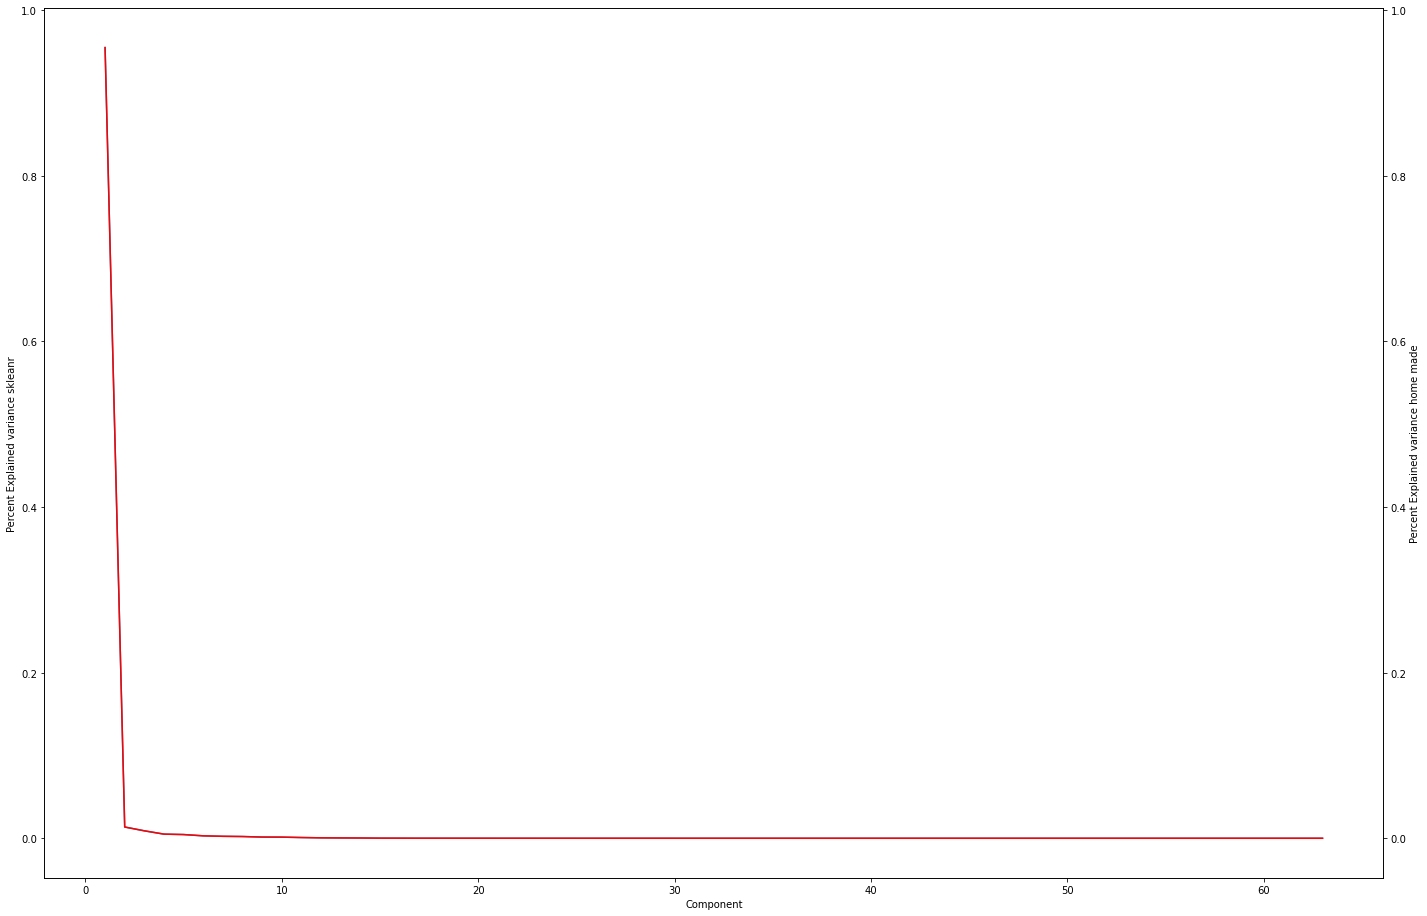

In [46]:
#Below is a plot of the explained variance for the purpose writen and sklearn PCA models. 
#Note the first four PCs are identical in magnitude and so the explained variance is as well. 
#The first four PC make up 98% explained variance. The first PC being 96% of the variance.


fig = plt.figure(figsize = (24, 16))
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Component')
ax1.set_ylabel('Percent Explained variance skleanr')
ax1.plot(np.arange(1,df_chk.shape[1] + 1), e_var_sk)

ax2 = ax1.twinx()

ax2.set_xlabel('Component')
ax2.set_ylabel('Percent Explained variance home made')
ax2.plot(np.arange(1,df_chk.shape[1] + 1), e_var_hm, color =  'red')


We see above that the two lines appear identical. Only the last few columns of the eigenvector matrices differed and those only contained a miniscule portion of the data. only the first four components or fewer are needed.



In [47]:
#Do a linear regression of the first column of transformed data from the from the custom function to see how well it predicts the currency exchange rates.


#slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(np.dot(pav[2], df_fpca.T)[0]),np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']))
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(pav[0][0]),np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']))
print(slope, intercept, r_value, p_value, std_err)
#print(pav[0][1], np.dot(pav[2], df_fpca.T)[0])

0.26568924985858466 1.33241124323397 0.9311066705827501 3.1473697478462884e-106 0.006746488506819058


In [48]:
#Do the same with the first column of transformed data from the sklearn PCA. Note the columns were identical.

slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(np.dot(df_chk.values, df_fpca.T)[0]),np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']))
print(slope, intercept, r_value, p_value, std_err)
#print(pav[0][1], np.dot(pav[2], df_fpca.T)[0])

0.26568924985858466 0.6144790530396249 0.93110667058275 3.1473697478470044e-106 0.0067464885068190626


Above we have performed a linear regression on the first column of the projected matrix of data (the product of the PCs and the original data.). We see that the first column does explain more variance than any of the previously 

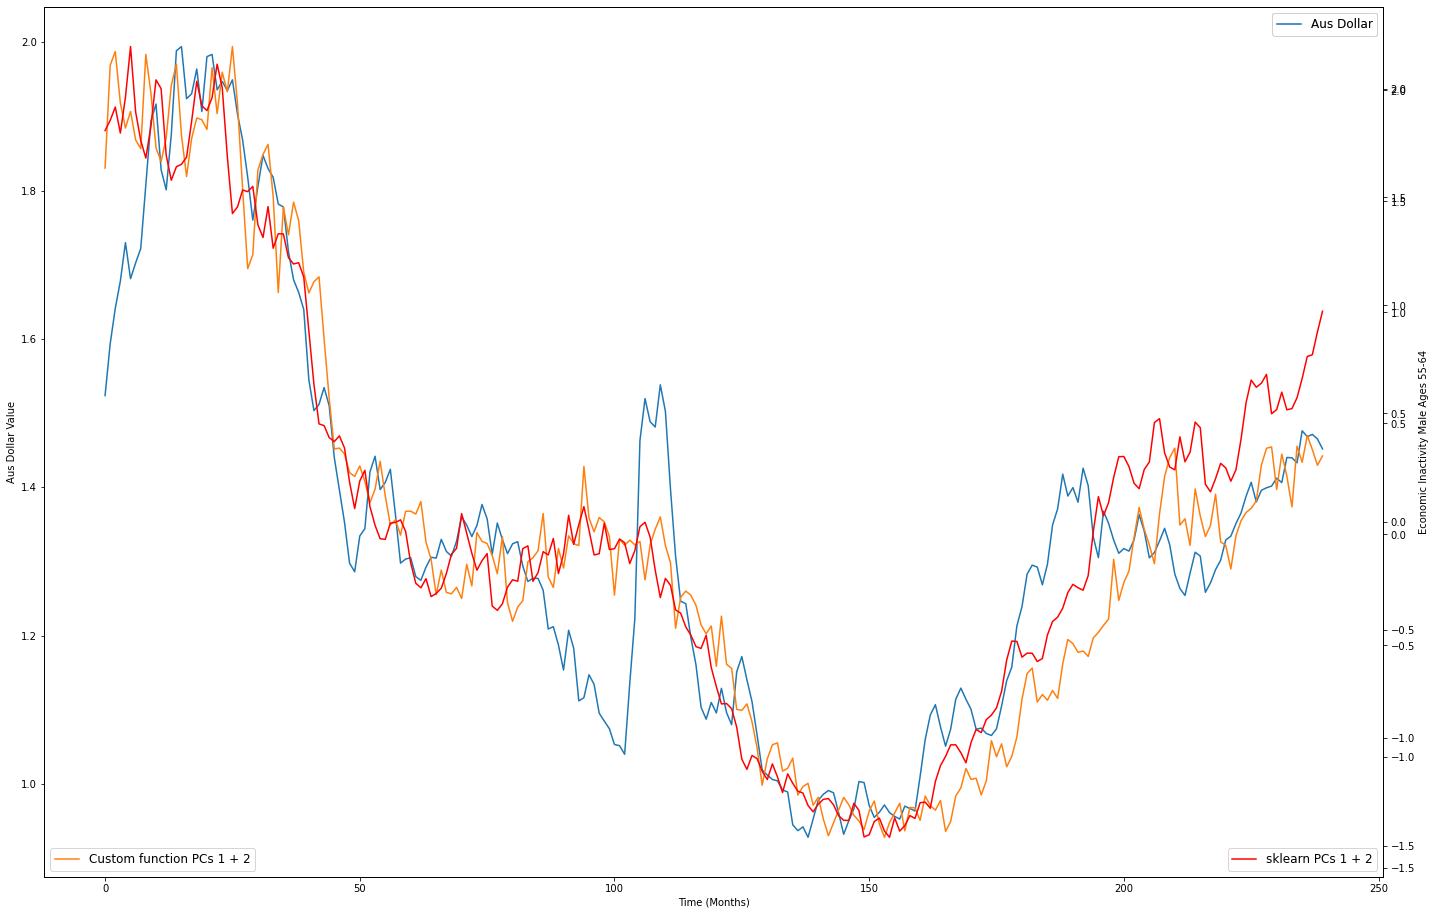

In [49]:
#Plot the most correlated value against the monthly average exchange rate.

fig = plt.figure(figsize = (24, 16))
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Aus Dollar Value')
ax1.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']), label = 'aus dollar')
#ax1.tick_params(axis='y')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()


color = 'tab:orange'
ax2.set_ylabel('Economic Inactivity Male Ages 55-64')  # we already handled the x-label with ax1
ax2.plot(df_c_ag.index, np.array(pav[0][0] + pav[0][1] + pav[0][2]), color = color, label = 'employment')

ax2.tick_params(axis='y')

#ax3.plot(df_c_ag.index, sv[0][0], color = color, label = 'employment')
ax3.plot(df_c_ag.index, np.array(stn_cmp[0] + stn_cmp[1] + stn_cmp[3]), color = 'red', label = 'employment')
#
#ax3.plot(df_c_ag.index, np.array(df_fpca[('UNE_DEA1_SEX_AGE_RT', 'AGE_AGGREGATE_Y25-54', 'none', 'SEX_T', 99)]), color = 'red', label = 'employment')
ax3.tick_params(axis='y')


leg1 = ax1.legend(['Aus Dollar'], prop = {'size':12})
leg2 = ax2.legend(['Custom function PCs 1 + 2'], loc = 'lower left', prop = {'size':12})
leg2 = ax3.legend(['sklearn PCs 1 + 2'], loc = 'lower right', prop = {'size':12})

#ax1.add_artist(leg1)
#ax2.add_artist(leg2)bbox_to_anchor=(0.5, 0., 0.5, 0.5)
#leg1.get_lines()[0].set_lw(1)
#leg2.get_lines()[0].set_lw(1)
#ax.plot(np.array(df_c_ag['Date']), np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));
ax1.add_artist(leg1)

#ax.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));

<h3>Analysis of the Data</h3>


We will use three different regression models from sklearn to see how well the can predict the curency exchange rate for the Australian dollar using the first three transformed columns of the sklean PCA analysis transformed labor data.



In [50]:
#Import the models.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [51]:
#In this cell the test data is made from the transformed labor data. Note that AUSn ranges between two and four vectors from the transformed space.

#AUSn = zip(np.array(np.dot(pav[2], df_fpca.T)[0]), np.array(np.dot(pav[2], df_fpca.T)[1]))

#AUSn = zip(np.array(pav[0][0]))
#AUSn = zip(np.array(pav[0][0]), np.array(pav[0][1]))
#AUSn = zip(np.array(pav[0][0]), np.array(pav[0][1]), np.array(pav[0][2]))
AUSn = zip(np.array(pav[0][0]), np.array(pav[0][1]), np.array(pav[0][2]), np.array(pav[0][3]))


#below uses the sklearn module


#AUSn = zip(np.array(stn_cmp[0]), np.array(stn_cmp[1]))
#AUSn = zip(np.array(stn_cmp[0]), np.array(stn_cmp)[1], np.array(stn_cmp[2]))
#AUSn = zip(np.array(stn_cmp[0]), np.array(stn_cmp)[1], np.array(stn_cmp)[2], np.array(stn_cmp[3]))
#

zAUSn = list(AUSn)

zfAUSn = zAUSn[:]

In [52]:
print(len(pav[0][0]))

240


Below we run three regressions, ridge, lasso, and elastic net. Each will search for the best parameters and output the parameters to a dataframe. It will also output the r2 score, mean absolute error, mean squared error, and normalized mean absolute error. Note that the four outputs in each model and four lines in each cell making a dataframe are to handle different numbers of variable (two to four variables) in the set of dependent variables. In all cases the currency exchange data is dependent variable.

In [53]:
#Ridge regression.

results_rg =[]
alpha =[.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))


zfAUSv = zfAUSn
    
for k in np.arange(2,20,1):
    clfv = Ridge()
    pars = {'alpha': [.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))}
    CV_clfv = GridSearchCV(estimator=clfv, param_grid = pars, scoring = 'r2', cv= k)
    CV_clfv.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    CV_clfv.best_params_
    
        #print(k, CV_clfv.best_params_['alpha'], CV_clfv.best_params_['l1_ratio'])
    
    clfv = Ridge(alpha = CV_clfv.best_params_['alpha'], fit_intercept = True)
    #clfv = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
    clfv.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    pred1v = clfv.predict(zfAUSv[216:])
    #print(clfv.coef_)
    #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
    #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))

    #results_rg.append([i,k,CV_clfv.best_params_['alpha'],clfv.coef_[0], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])
    #results_rg.append([i,k,CV_clfv.best_params_['alpha'],clfv.coef_[0], clfv.coef_[1], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])
    #results_rg.append([i,k,CV_clfv.best_params_['alpha'],clfv.coef_[0], clfv.coef_[1], clfv.coef_[2], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
    results_rg.append([i,k,CV_clfv.best_params_['alpha'],clfv.coef_[0], clfv.coef_[1], clfv.coef_[2], clfv.coef_[3], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


In [54]:
#Make a dataframe.

df_r_rd = pd.DataFrame(results_rg)

#df_r_rd.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'r2_score', 'mean abs error', 'mean sqr error', 'mean abs error norm']
#df_r_rd.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'r2_score', 'mean abs error', 'mean sqr error', 'mean abs error norm']
#df_r_rd.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'Coef 3', 'r2_score', 'mean abs error', 'mean abs error', 'mean abs error norm']
df_r_rd.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'Coef 3', 'Coef 4', 'r2_score', 'mean abs error', 'mean abs error', 'mean abs error norm']

df_r_rd.head()

,date,kfolds,alpha,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean abs error,mean abs error norm
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,5.0,0.260333,-0.017261,0.015403,0.002197,0.649722,0.031467,0.001406,0.022656
1,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",3,3.0,0.262830,-0.024614,0.022295,0.002562,0.614600,0.033231,0.001547,0.023926
2,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",4,3.0,0.262830,-0.024614,0.022295,0.002562,0.614600,0.033231,0.001547,0.023926
3,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",5,2.0,0.264119,-0.030979,0.028611,0.002703,0.584794,0.034581,0.001667,0.024898
4,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",6,3.0,0.262830,-0.024614,0.022295,0.002562,0.614600,0.033231,0.001547,0.023926


In [55]:
#Rank by r2 score.
df_r_rd.nlargest(5, 'r2_score')

,date,kfolds,alpha,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean abs error,mean abs error norm
7,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",9,7.5,0.257308,-0.012373,0.011053,0.001855,0.675463,0.029995,0.001303,0.021596
10,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",12,7.0,0.257906,-0.013136,0.011720,0.001913,0.671195,0.030253,0.001320,0.021782
11,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",13,5.5,0.259720,-0.016027,0.014287,0.002118,0.655928,0.031129,0.001381,0.022413
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,5.0,0.260333,-0.017261,0.015403,0.002197,0.649722,0.031467,0.001406,0.022656
12,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",14,5.0,0.260333,-0.017261,0.015403,0.002197,0.649722,0.031467,0.001406,0.022656


In [56]:
#Rank by the mean absolute error.
df_r_rd.nsmallest(5, 'mean abs error norm')

,date,kfolds,alpha,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean abs error,mean abs error norm
7,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",9,7.5,0.257308,-0.012373,0.011053,0.001855,0.675463,0.029995,0.001303,0.021596
10,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",12,7.0,0.257906,-0.013136,0.011720,0.001913,0.671195,0.030253,0.001320,0.021782
11,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",13,5.5,0.259720,-0.016027,0.014287,0.002118,0.655928,0.031129,0.001381,0.022413
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,5.0,0.260333,-0.017261,0.015403,0.002197,0.649722,0.031467,0.001406,0.022656
12,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",14,5.0,0.260333,-0.017261,0.015403,0.002197,0.649722,0.031467,0.001406,0.022656


In [57]:
#Lasso regression.

results_ls =[]


zfAUSv = zfAUSn


for k in np.arange(2,20,1):
    clf1v = Lasso()
    pars = {'alpha': [.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))}
    CV_clf1v = GridSearchCV(estimator=clf1v, param_grid = pars, scoring = 'r2', cv= k)
    CV_clf1v.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    CV_clf1v.best_params_
    
    #print(k, CV_clf1v.best_params_['alpha'])
    
    clf1v = Lasso(alpha = CV_clf1v.best_params_['alpha'], fit_intercept = True)
    #clf1v = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
    clf1v.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    pred2v = clf1v.predict(zfAUSv[216:])
    #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
    #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
    #print(clf2.score(X_test_4, np.asarray(y_test_4)))
    
    #results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])
    #results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
    #results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], clf1v.coef_[2], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
    results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], clf1v.coef_[2], clf1v.coef_[3], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


In [58]:
#Make a dataframe of the results.


df_r_ls = pd.DataFrame(results_ls)

#df_r_ls.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'r2_score', 'mean abs error', 'mean sqr err', 'mean abs err norm']
#df_r_ls.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'r2_score', 'mean abs error', 'mean sqr err', 'mean abs err norm']
#df_r_ls.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'coef 3', 'r2_score', 'mean abs error', 'mean sqr err', 'mean abs err norm']
df_r_ls.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'coef 3', 'coef 4', 'r2_score', 'mean abs error', 'mean sqr err', 'mean abs err norm']

df_r_ls.head()


,date,kfolds,alpha,Coef 1,Coef 2,coef 3,coef 4,r2_score,mean abs error,mean sqr err,mean abs err norm
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,0.010,0.256121,-0.0,0.0,0.0,0.712443,0.028005,0.001154,0.020163
1,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",3,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
2,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",4,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
3,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",5,0.001,0.265365,-0.0,0.0,0.0,0.683460,0.029952,0.001271,0.021565
4,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",6,0.001,0.265365,-0.0,0.0,0.0,0.683460,0.029952,0.001271,0.021565


In [59]:
#Rank by r2 score.
df_r_ls.nlargest(5,'r2_score')

,date,kfolds,alpha,Coef 1,Coef 2,coef 3,coef 4,r2_score,mean abs error,mean sqr err,mean abs err norm
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,0.010,0.256121,-0.0,0.0,0.0,0.712443,0.028005,0.001154,0.020163
1,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",3,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
2,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",4,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
7,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",9,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
9,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",11,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916


In [60]:
#Rank by mean absolutel error.

df_r_ls.nsmallest(5, 'mean abs error')

,date,kfolds,alpha,Coef 1,Coef 2,coef 3,coef 4,r2_score,mean abs error,mean sqr err,mean abs err norm
0,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",2,0.010,0.256121,-0.0,0.0,0.0,0.712443,0.028005,0.001154,0.020163
1,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",3,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
2,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",4,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
7,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",9,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916
9,"[EMP_TEMP_SEX_AGE_JOB_NB, AGE_YTHADULT_Y15-24,...",11,0.005,0.261256,-0.0,0.0,0.0,0.697117,0.029051,0.001216,0.020916


In [61]:
#Elastic net regression.

results_en =[]
shifts = np.arange(-5,1,5)


zfAUSv = zfAUSn
    
for k in np.arange(2,12,1):
    clf2v = ElasticNet()
    pars = {'alpha': [.001, .005, .007, .05, .1, .25,] + list(np.arange(.5,10,.5)), 'l1_ratio' : [.001,.01, .05, .1, .15, .2, .25, .5, .75, .9]}
    CV_clf2v = GridSearchCV(estimator=clf2v, param_grid = pars, scoring = 'r2', cv= k)
    CV_clf2v.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    CV_clf2v.best_params_
    
    #print(k, CV_clf2v.best_params_['alpha'], CV_clf2v.best_params_['l1_ratio'])
     
    clf2v = ElasticNet(alpha = CV_clf2v.best_params_['alpha'], l1_ratio = CV_clf2v.best_params_['l1_ratio'], fit_intercept = True)
    #clf2v = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
    clf2v.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
    pred3v = clf2v.predict(zfAUSv[216:])
    print(clf2v.coef_)
    #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
    #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
    #print(clf2.score(X_test_4, np.asarray(y_test_4)))
    
    
    #results_en.append([k,CV_clf2v.best_params_['alpha'],CV_clf2v.best_params_['l1_ratio'],clf2v.coef_[0], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])  
    #results_en.append([k,CV_clf2v.best_params_['alpha'],CV_clf2v.best_params_['l1_ratio'],clf2v.coef_[0], clf2v.coef_[1], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
    #results_en.append([k,CV_clf2v.best_params_['alpha'],CV_clf2v.best_params_['l1_ratio'],clf2v.coef_[0], clf2v.coef_[1], clf2v.coef_[2], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])
    results_en.append([k,CV_clf2v.best_params_['alpha'],CV_clf2v.best_params_['l1_ratio'],clf2v.coef_[0], clf2v.coef_[1], clf2v.coef_[2], clf2v.coef_[3], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


[ 0.2515513 -0.         0.         0.       ]
[ 0.26314853 -0.          0.          0.        ]
[ 0.26409096 -0.          0.          0.        ]
[ 0.26544042 -0.          0.          0.        ]
[ 0.26544042 -0.          0.          0.        ]
[ 0.26409096 -0.          0.          0.        ]
[ 0.26544042 -0.          0.          0.        ]
[ 0.26185575 -0.          0.          0.        ]
[ 0.26409096 -0.          0.          0.        ]
[ 0.26343882 -0.          0.          0.        ]


In [62]:
#Make a dataframe of the output.

df_e_rd = pd.DataFrame(results_en)

#df_e_rd.columns = ['kfolds', 'alpha', 'l1_ratio', 'Coef 1', 'r2_score', 'mean abs error', 'mean sqr error', 'mean sqr error norm']
#df_e_rd.columns = ['kfolds', 'alpha', 'l1_ratio', 'Coef 1', 'Coef 2', 'r2_score', 'mean abs error', 'mean sqr error', 'mean abs error norm']
#df_e_rd.columns = ['kfolds', 'alpha', 'l1_ratio', 'Coef 1', 'Coef 2', 'Coef 3', 'r2_score', 'mean abs error', 'mean sqr error', 'mean abs error norm']
df_e_rd.columns = ['kfolds', 'alpha', 'l1_ratio', 'Coef 1', 'Coef 2', 'Coef 3', 'Coef 4', 'r2_score', 'mean abs error', 'mean sqr error', 'mean abs error norm']


df_e_rd

,kfolds,alpha,l1_ratio,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean sqr error,mean abs error norm
0,2,0.050,0.05,0.251551,-0.0,0.0,0.0,0.724450,0.027075,0.001106,0.019493
1,3,0.005,0.50,0.263149,-0.0,0.0,0.0,0.690981,0.029440,0.001241,0.021197
2,4,0.005,0.25,0.264091,-0.0,0.0,0.0,0.687828,0.029658,0.001253,0.021353
3,5,0.001,0.90,0.265440,-0.0,0.0,0.0,0.683198,0.029970,0.001272,0.021578
4,6,0.001,0.90,0.265440,-0.0,0.0,0.0,0.683198,0.029970,0.001272,0.021578
5,7,0.005,0.25,0.264091,-0.0,0.0,0.0,0.687828,0.029658,0.001253,0.021353
6,8,0.001,0.90,0.265440,-0.0,0.0,0.0,0.683198,0.029970,0.001272,0.021578
7,9,0.007,0.50,0.261856,-0.0,0.0,0.0,0.695202,0.029173,0.001224,0.021004
8,10,0.005,0.25,0.264091,-0.0,0.0,0.0,0.687828,0.029658,0.001253,0.021353
9,11,0.007,0.20,0.263439,-0.0,0.0,0.0,0.690017,0.029507,0.001244,0.021245


In [63]:
#Rank by r2 score.
df_e_rd.nlargest(5, 'r2_score')

,kfolds,alpha,l1_ratio,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean sqr error,mean abs error norm
0,2,0.050,0.05,0.251551,-0.0,0.0,0.0,0.724450,0.027075,0.001106,0.019493
7,9,0.007,0.50,0.261856,-0.0,0.0,0.0,0.695202,0.029173,0.001224,0.021004
1,3,0.005,0.50,0.263149,-0.0,0.0,0.0,0.690981,0.029440,0.001241,0.021197
9,11,0.007,0.20,0.263439,-0.0,0.0,0.0,0.690017,0.029507,0.001244,0.021245
2,4,0.005,0.25,0.264091,-0.0,0.0,0.0,0.687828,0.029658,0.001253,0.021353


In [64]:
#Rank by mean absolute error.
df_e_rd.nsmallest(5, 'mean abs error')

,kfolds,alpha,l1_ratio,Coef 1,Coef 2,Coef 3,Coef 4,r2_score,mean abs error,mean sqr error,mean abs error norm
0,2,0.050,0.05,0.251551,-0.0,0.0,0.0,0.724450,0.027075,0.001106,0.019493
7,9,0.007,0.50,0.261856,-0.0,0.0,0.0,0.695202,0.029173,0.001224,0.021004
1,3,0.005,0.50,0.263149,-0.0,0.0,0.0,0.690981,0.029440,0.001241,0.021197
9,11,0.007,0.20,0.263439,-0.0,0.0,0.0,0.690017,0.029507,0.001244,0.021245
2,4,0.005,0.25,0.264091,-0.0,0.0,0.0,0.687828,0.029658,0.001253,0.021353


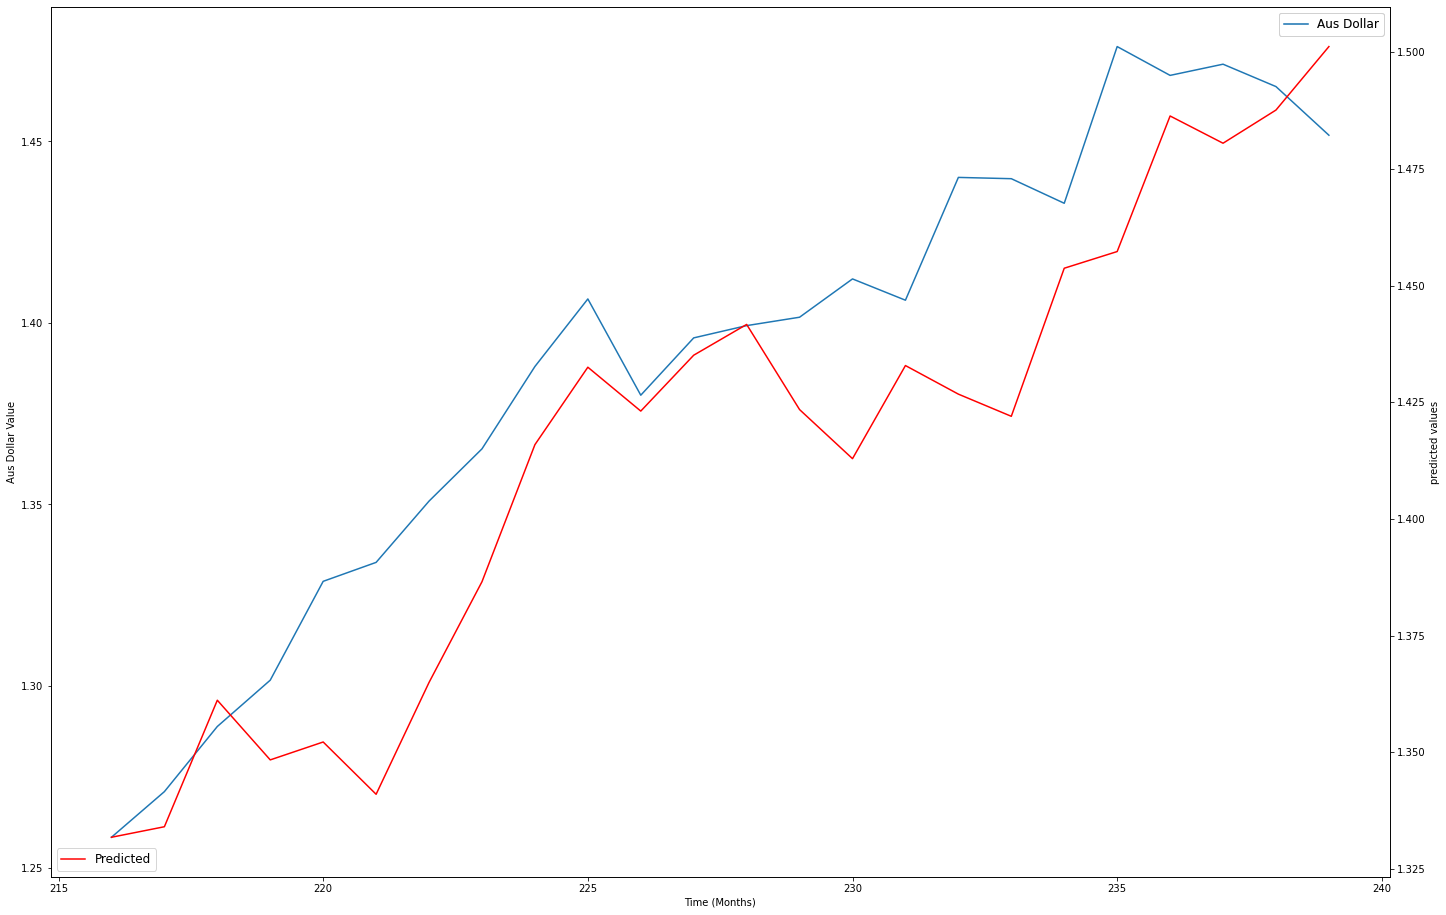

In [65]:
# We plot the elastic net predicted data for the last sixteen value of the currency exchange rates against their real counterparts.


fig = plt.figure(figsize = (24, 16))
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Aus Dollar Value')
ax1.plot(df_c_ag.index[216:], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][216:]), label = 'aus dollar')
#ax1.tick_params(axis='y')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('predicted values')  # we already handled the x-label with ax1
ax2.plot(df_c_ag.index[216:], clf1v.predict(zfAUSn[216:]), label = 'Predicted', color = 'red')
#ax2.set_ylim([.8,2])
#ax2.
ax2.tick_params(axis='y')

leg1 = ax1.legend(['Aus Dollar'], prop = {'size':12})
leg2 = ax2.legend(['Predicted'], loc = 'lower left', prop = {'size':12})
#ax1.add_artist(leg1)
#ax2.add_artist(leg2)bbox_to_anchor=(0.5, 0., 0.5, 0.5)
#leg1.get_lines()[0].set_lw(1)
#leg2.get_lines()[0].set_lw(1)
#ax.plot(np.array(df_c_ag['Date']), np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));
ax1.add_artist(leg1)

#ax.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));

Below will try a nearest neighbor regression to see if it gives a different result.

In [66]:
zfAUSv = zfAUSn

nn = 5


ngh = KNeighborsRegressor(nn)

ngh.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])

pred4v = ngh.predict(zfAUSv[216:])
    
#results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])])
#results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
#results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], clf1v.coef_[2], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 
#results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], clf1v.coef_[2], clf1v.coef_[3], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 

#score = ngh.score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:].reshape(-1,1), pred4v)

#print(score)
print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred4v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred4v))
#print(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])

-0.187176170101661 0.062213774836878115


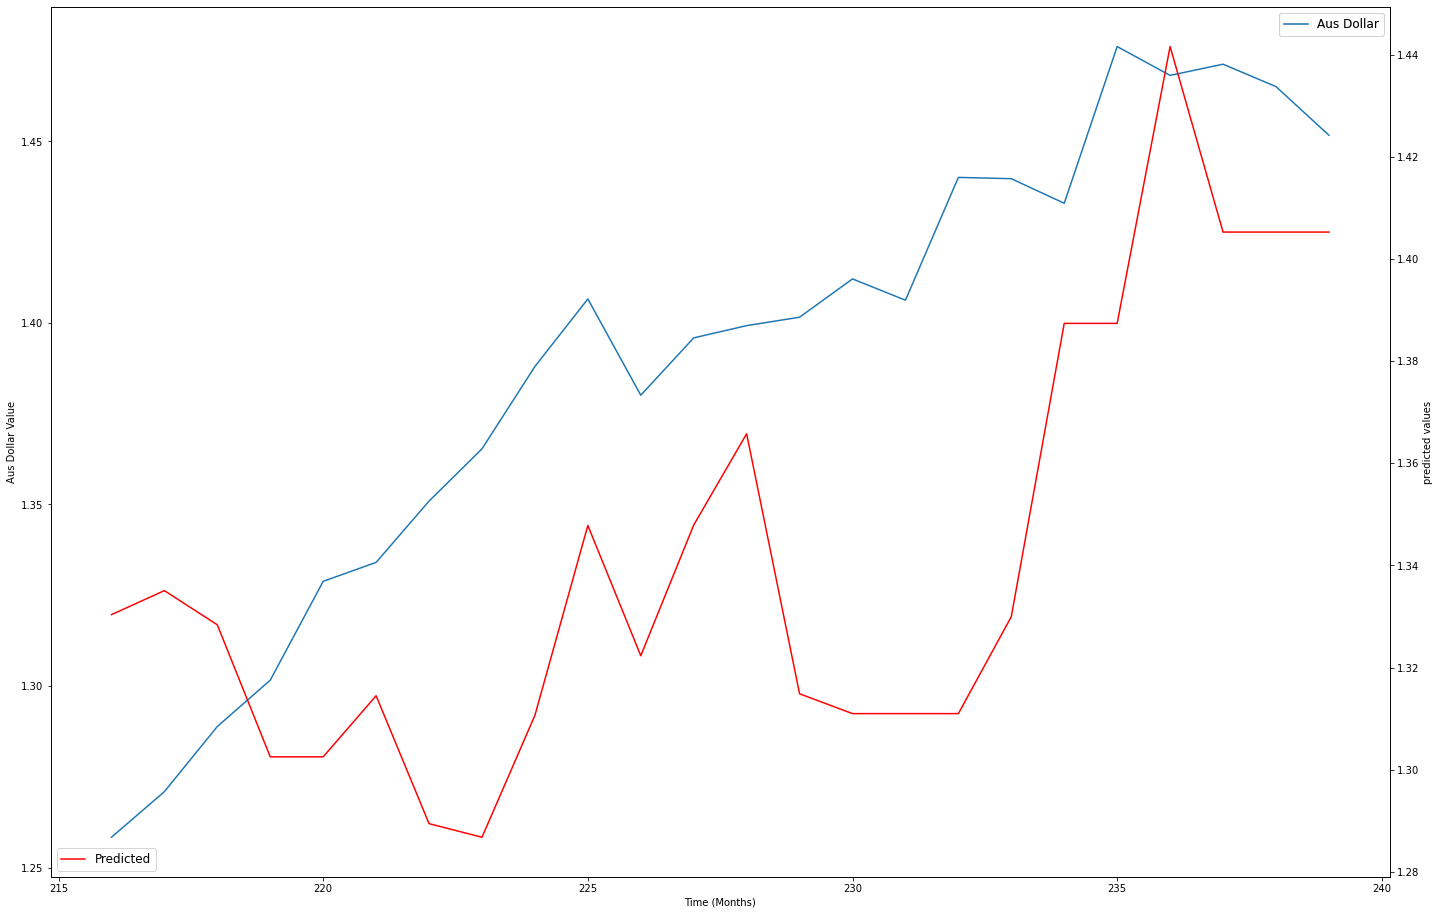

In [67]:

fig = plt.figure(figsize = (24, 16))
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Aus Dollar Value')
ax1.plot(df_c_ag.index[216:], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][216:]), label = 'aus dollar')
#ax1.tick_params(axis='y')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('predicted values')  # we already handled the x-label with ax1
ax2.plot(df_c_ag.index[216:], pred4v, label = 'Predicted', color = 'red')
#ax2.set_ylim([.8,2])
#ax2.
ax2.tick_params(axis='y')

leg1 = ax1.legend(['Aus Dollar'], prop = {'size':12})
leg2 = ax2.legend(['Predicted'], loc = 'lower left', prop = {'size':12})
#ax1.add_artist(leg1)
#ax2.add_artist(leg2)bbox_to_anchor=(0.5, 0., 0.5, 0.5)
#leg1.get_lines()[0].set_lw(1)
#leg2.get_lines()[0].set_lw(1)
#ax.plot(np.array(df_c_ag['Date']), np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));
ax1.add_artist(leg1)

#ax.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));

<h3>Conclusions</h3>

The r2 scores were high for all predictive models and the graphs of the transformed labor data values comprared to the currency exhange values show a good long term correlation between the transformed labor data and the currency exchange rates. This indicates that the models could be a good predictor of long term or large scale behavior. However the graphs of the short term predictions of the models against the last twenty-four datapoints show that the usefulness in short term prediction is likely low.

We also saw earlier that the labor data high cross correlations of most predictive labor data that there could be an underling variable predicting both the labor rates and the currenc exchange rates. 

At this point it seems that refinement of the modeling using the labor rates as well as exploring other possible explanatory measurements are worthwhile future endeavors. 